<a href="https://colab.research.google.com/github/davids0064/analisis_datos/blob/main/Taller_inova_pre1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**1. Importación de Librerías**

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
import math
import scipy.stats as ss
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt

###**2. Cargue del Dataset**

**2.1. Acerca del Dataset**

German Credit es un dataset utilizado para evaluar modelos de riesgo crediticio.

El objetivo es predecir si un solicitante de crédito es un bueno o malo para pagar, a partir de información financiera, personal y del préstamo.

In [67]:
df=pd.read_csv('german_credit.csv',sep=";")

**2.2. Diccionario de las variables**

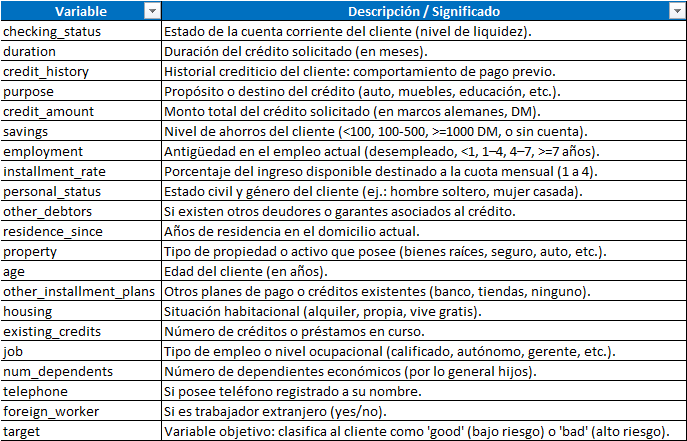

**2.3. Variable Objetivo**

La variable objetivo es "**target**", ya que expresa el comportamiento crediticio final del cliente, definiéndolo como “good” (buen pagador) o “bad” (mal pagador).

**2.4. Objetivo de los Modelos**

El objetivo es obtener un modelo con un buen recall de “bad”, ya que el NO identificar un mal cliente puede implicar pérdidas directas.

El recall permite medir qué tan bien el modelo identifica correctamente los casos positivos.

Para interpretarlo con mayor claridad, el recall se clasifica en tres niveles según su capacidad de detección:

**Bajo:** entre	0.00 y 0.50.	El modelo pierde la mayoría de los positivos.

**Medio:**	entre 0.51 y 0.75.	El modelo detecta una proporción aceptable.

**Alto:**	entre 0.76 y 1.00.	El modelo identifica casi todos los positivos.

###**3. Análisis Exploratorio de Datos**



**3.1. Contenido y tamaño del DataFrame**

In [68]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
0,< 0 DM,6,critical account / other credits existing,radio/television,1169,unknown / no savings account,? 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer’s name",yes,good
1,0 ? ... < 200 DM,48,existing credits paid till now,radio/television,5951,< 100 DM,1 ? ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,no,yes,bad
2,no checking account,12,critical account / other credits existing,education,2096,< 100 DM,4 ? ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,good
3,< 0 DM,42,existing credits paid till now,furniture/equipment,7882,< 100 DM,4 ? ... < 7 years,2,male : single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled employee / official,2,no,yes,good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 ? ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,no,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid till now,furniture/equipment,1736,< 100 DM,4 ? ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,good
996,< 0 DM,30,existing credits paid till now,car (used),3857,< 100 DM,1 ? ... < 4 years,4,male : divorced/separated,none,...,building society savings/life insurance,40,none,own,1,management / self-employed / highly qualified,1,"yes, registered under the customer’s name",yes,good
997,no checking account,12,existing credits paid till now,radio/television,804,< 100 DM,? 7 years,4,male : single,none,...,car or other,38,none,own,1,skilled employee / official,1,no,yes,good
998,< 0 DM,45,existing credits paid till now,radio/television,1845,< 100 DM,1 ? ... < 4 years,4,male : single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customer’s name",yes,bad


**3.2. Tipo de Variables del DataFrame**

In [69]:
df.info()

numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("\n====================================")
print(f"Total variables numéricas: {len(numericas)}")
print(f"Total variables categóricas: {len(categoricas)}")
print("====================================")

nulos_totales = df.isnull().sum().sum()
nulos_por_columna = df.isnull().sum()

print("\n====================================")
if nulos_totales == 0:
    print("No hay valores nulos en el DataFrame.")
else:
    print(f"Hay un total de {nulos_totales} valores nulos.")
    print("\nNulos por columna:")
    print(nulos_por_columna[nulos_por_columna > 0])
print("====================================")

duplicados = df.duplicated().sum()

print("\n====================================")
if duplicados == 0:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print(f"Hay {duplicados} filas duplicadas.")
    print("Puedes verlas con: df[df.duplicated()]")
print("====================================")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_status          1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status          1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

**3.3. Estadística Descriptiva de las Variables Numéricas**

In [70]:
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**3.4. Descripción de las Variables Categóricas**

In [71]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()

for col in categoricas:
    categorias_unicas = df[col].unique()
    num_categorias = len(categorias_unicas)

    print(f"\n\033[1m{col}\033[0m: {num_categorias} categorías \n")

    conteos = df[col].value_counts()

    for cat, count in conteos.items():
        print(f"    * {cat}  →  {count}")


checking_status: 4 categorías 

    * no checking account  →  394
    * < 0 DM  →  274
    * 0 ? ... < 200 DM  →  269
    * ? 200 DM / salary assigned  →  63

credit_history: 5 categorías 

    * existing credits paid till now  →  530
    * critical account / other credits existing  →  293
    * delay in paying off in the past  →  88
    * all credits at this bank paid duly  →  49
    * no credits taken / all paid duly  →  40

purpose: 10 categorías 

    * radio/television  →  280
    * car (new)  →  234
    * furniture/equipment  →  181
    * car (used)  →  103
    * business  →  97
    * education  →  50
    * repairs  →  22
    * domestic appliances  →  12
    * others  →  12
    * retraining  →  9

savings: 5 categorías 

    * < 100 DM  →  603
    * unknown / no savings account  →  183
    * 100 ? ... < 500 DM  →  103
    * 500 ? ... < 1000 DM  →  63
    * ? 1000 DM  →  48

employment: 5 categorías 

    * 1 ? ... < 4 years  →  339
    * ? 7 years  →  253
    * 4 ? ... < 7 years

La variable objetivo "target" está desbalanceada, con un 70% de clientes clasificados como “good” y un 30% como “bad”.

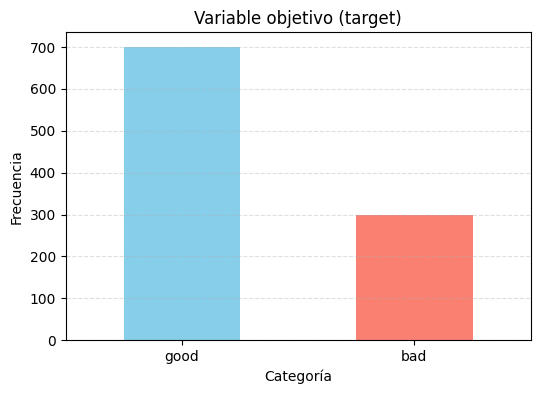

In [72]:
plt.figure(figsize=(6,4))
df['target'].value_counts().plot(kind='bar', color=['skyblue','salmon'])

plt.title("Variable objetivo (target)")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

**3.5. Correlación de las Variables Categóricas vs. Variable Objetivo (target)**

In [73]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

target = "target"

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

resultados = {}
for col in cat_cols:
    if col != target:
        resultados[col] = cramers_v(df[col], df[target])

cramer_df = pd.DataFrame.from_dict(resultados, orient="index", columns=["Cramers_V"])
cramer_df = cramer_df.sort_values(by="Cramers_V", ascending=False)

print(cramer_df)

                         Cramers_V
checking_status           0.347619
credit_history            0.240302
savings                   0.179240
purpose                   0.156115
property                  0.144005
housing                   0.127334
employment                0.119911
other_installment_plans   0.104154
personal_status           0.081295
foreign_worker            0.069465
other_debtors             0.068176
telephone                 0.013105
job                       0.000000


Las variables categóricas que muestran mayor asociación con la variable objetivo (target) son "**checking_status**" y "**credit_history**". Las variables "**savings**" y "**purpose**" también podrían considerarse.
Las variables "job", "telephone", "other_debtors", "foreign_worker" y "personal_status" muestran una asociación mínima con la variable objetivo (target).

**3.6. Conversión de la Variable Objetivo (target) en numérica**

In [74]:
df['target']=df['target'].map({'good':0,'bad':1})

**3.7. Conversión en dummies de las Variables Categóricas de mayor asociación con la Variable Objetivo (target)**

In [75]:
variables_dummificar = ['checking_status', 'credit_history', 'savings','purpose']

df_dummies = pd.get_dummies(df,
                            columns=variables_dummificar,
                            drop_first=True)

**3.8. Correlación de las Variables Numéricas y Dummies vs. Variable Objetivo (target)**

In [76]:
df_num = df_dummies.select_dtypes(include=['int64', 'float64', 'uint8', 'bool'])

corr_target = df_num.corr()['target'].drop('target')

corr_target_sorted = corr_target.sort_values(ascending=False)

corr_target_sorted

,target
checking_status_< 0 DM,0.258333
duration,0.214927
savings_< 100 DM,0.161007
credit_amount,0.154739
credit_history_no credits taken / all paid duly,0.144767
purpose_car (new),0.096900
installment_rate,0.072404
purpose_education,0.070088
credit_history_existing credits paid till now,0.043722
purpose_others,0.028058


**3.9. Top 10 de las Variables Numéricas y Dummies más correlacionadas con la Variable Objetivo (target)**

In [77]:
df_num = df_dummies.select_dtypes(include=['int64','float64','uint8','bool']).copy()

corr_target = df_num.corr()['target'].drop('target')

corr_abs = corr_target.abs().sort_values(ascending=False).head(10)

tabla_corr = pd.DataFrame({
    "Variable": corr_abs.index,
    "Correlación": corr_target[corr_abs.index].values,
    "Correlación_absoluta": corr_abs.values})

tabla_corr = tabla_corr.sort_values("Correlación_absoluta", ascending=False)

tabla_corr

,Variable,Correlación,Correlación_absoluta
0,checking_status_no checking account,-0.322436,0.322436
1,checking_status_< 0 DM,0.258333,0.258333
2,duration,0.214927,0.214927
3,credit_history_critical account / other credit...,-0.181713,0.181713
4,savings_< 100 DM,0.161007,0.161007
5,credit_amount,0.154739,0.154739
6,credit_history_no credits taken / all paid duly,0.144767,0.144767
7,savings_unknown / no savings account,-0.129238,0.129238
8,purpose_radio/television,-0.106922,0.106922
9,purpose_car (used),-0.099791,0.099791


**3.10. Análisis Univariado de las 10 de las Variables Numéricas y Dummies más correlacionadas con la Variable Objetivo (target)**

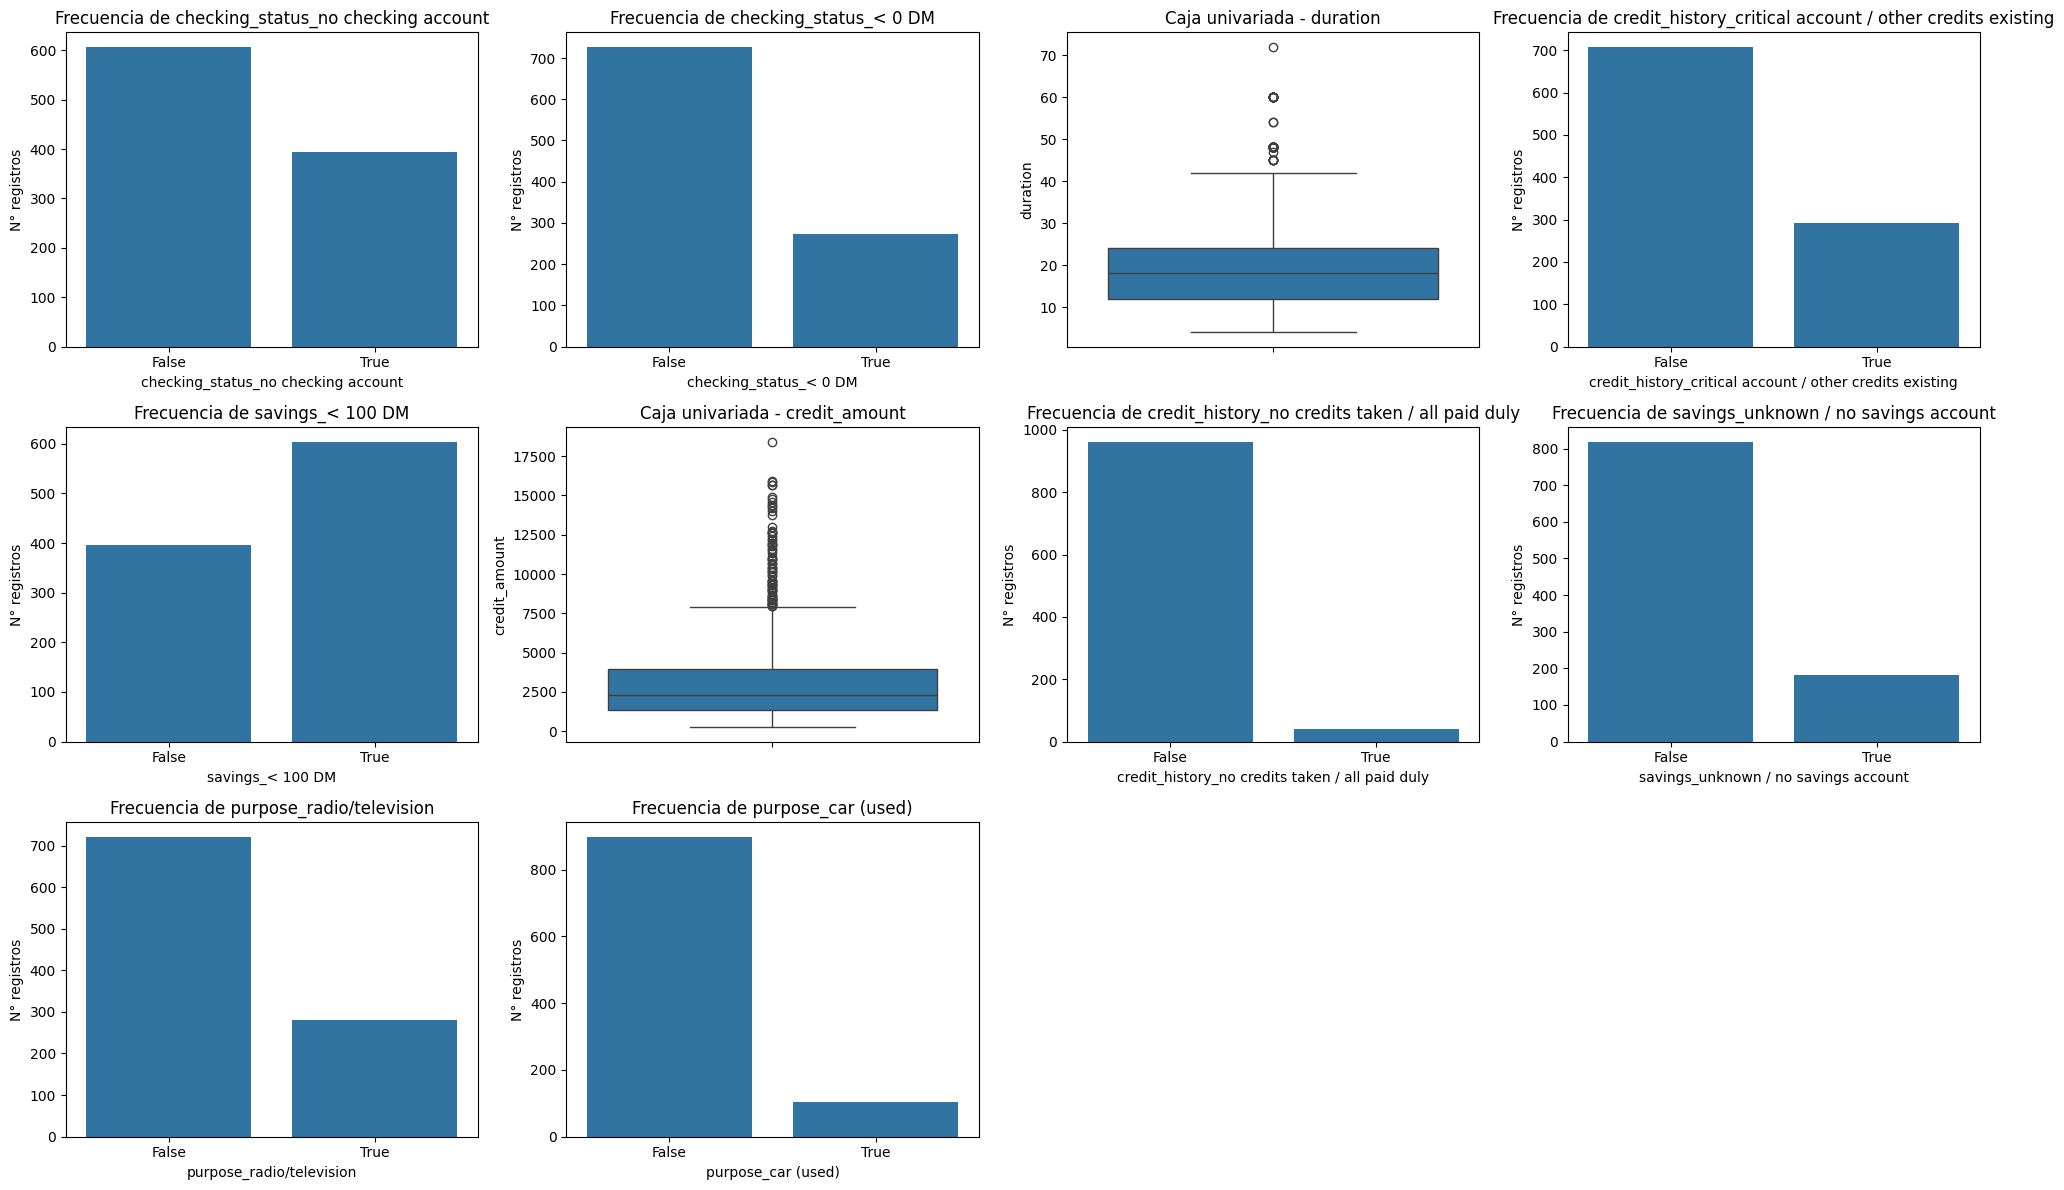

In [78]:
top_vars = tabla_corr["Variable"].values

n = len(top_vars)

cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(top_vars):
    ax = axes[i]

    if df_num[col].nunique() <= 2:
        sns.countplot(x=col, data=df_num, ax=ax)
        ax.set_title(f"Frecuencia de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("N° registros")
    else:
        sns.boxplot(y=df_num[col], ax=ax)
        ax.set_title(f"Caja univariada - {col}")
        ax.set_ylabel(col)

for j in range(i + 1, cols * rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**1. checking_status_no checking account:** La mayoría de los solicitantes no tienen cuenta bancaria.

**2. checking_status_< 0 DM:** la mayoría de los solicitantes NO tiene saldo negativo.

**3. duration (boxplot):** tiene mucha dispersión, con valores desde 4 hasta 70 meses. La mediana está alrededor de 18 meses. Hay outliers significativos en créditos de largo plazo.

**4. credit_history_critical account / other credits existing:** La mayoría de los solicitantes NO tienen historial crítico.

**5. savings_<100 DM:** gran parte de los solicitantes tiene ahorros menores a 100 DM.

**6. credit_amount (boxplot):** Distribución muy sesgada hacia la derecha. La mayoría de los créditos son pequeños, pero existen varios casos extremos (más de 15.000).

**7. credit_history_no credits taken / all paid duly:** la mayoría pertenece a esta categoría (historial bueno).

**8. savings_unknown / no savings account:** más de 800 solicitantes no tienen cuenta de ahorros o no reportan información.

**9. purpose_radio/television:** esta categoría domina entre las finalidades del crédito.

**10. purpose_car (used):** poco pero relevante.

**3.11. Análisis Bivariado de las 10 de las Variables Numéricas y Dummies más correlacionadas con la Variable Objetivo (target)**

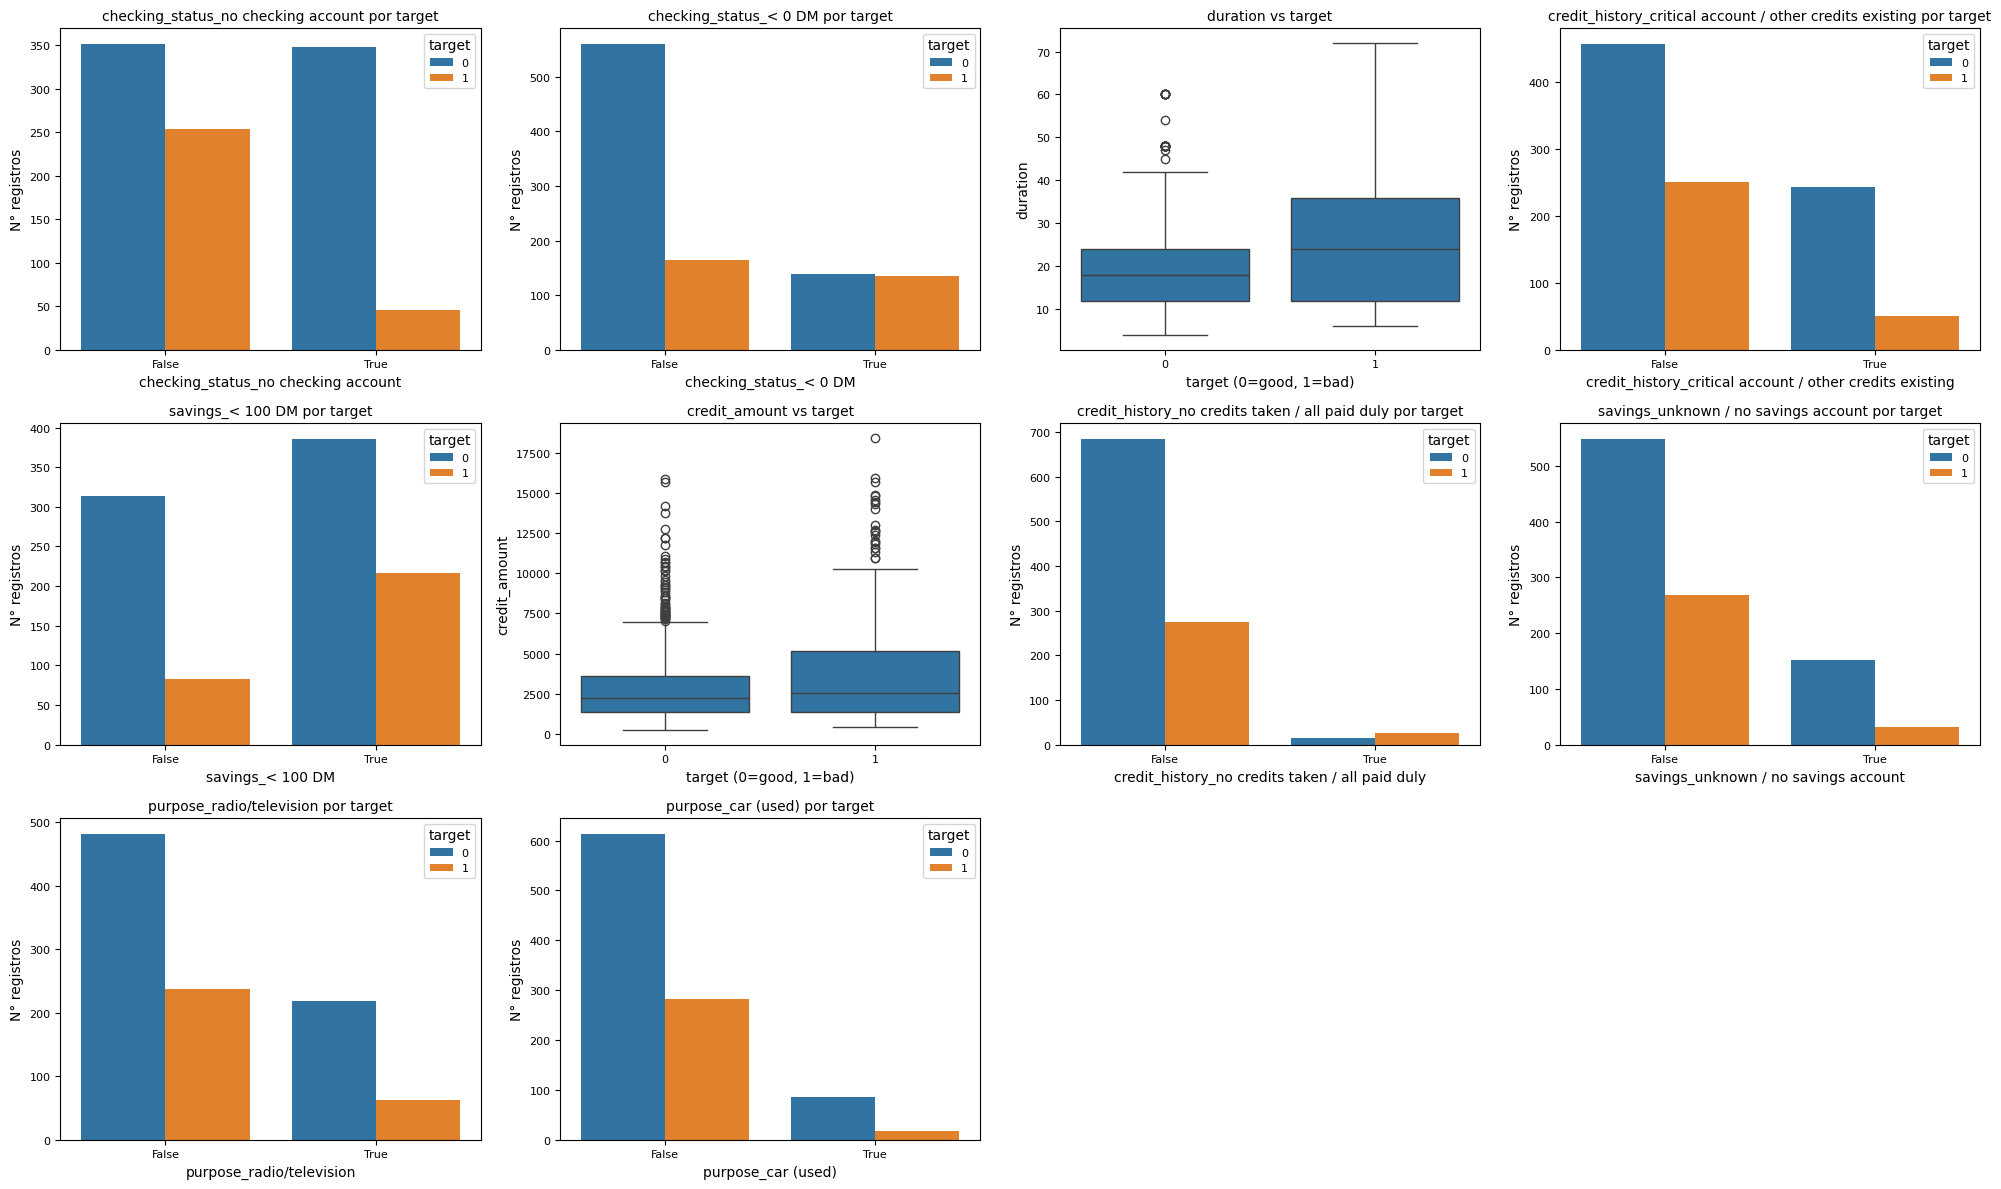

In [79]:
vars_bi = [v for v in top_vars if v != 'target']

n = len(vars_bi)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(vars_bi):
    ax = axes[i]

    if df_num[col].nunique() > 2:
        sns.boxplot(x='target', y=col, data=df_num, ax=ax)
        ax.set_title(f"{col} vs target", fontsize=10)
        ax.set_xlabel("target (0=good, 1=bad)")
        ax.set_ylabel(col)

    else:
        sns.countplot(x=col, hue='target', data=df_num, ax=ax)
        ax.set_title(f"{col} por target", fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel("N° registros")
        ax.legend(title="target", fontsize=8)

    ax.tick_params(axis='both', labelsize=8)

for j in range(i + 1, cols * rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**1. checking_status_no checking account vs target:** los solicitantes sin cuenta bancaria (True) tienen una proporción mayor de casos “bad”.

**2. checking_status_< 0 DM vs target:** los solicitantes con saldo < 0 DM muestran mayor proporción de incumplimientos.

**3. duration vs target (boxplot):** los créditos “bad” muestran una mediana mayor en duración. Tienen un rango más amplio y más valores extremos.

**4. credit_history_critical account / other credits existing vs target:** los solicitantes con historial crítico presentan una proporción mucho mayor de “bad”.

**5. savings_< 100 DM vs target:** los solicitantes con menos de 100 DM en ahorros tienen una tasa más alta de “bad”.

**6. credit_amount vs target (boxplot):** los solicitantes “bad” tienen montos de crédito ligeramente mayores (se ve mediana más alta). Los outliers son más frecuentes en el grupo bad.

**7. credit_history_no credits taken / all paid duly vs target:** los solicitantes que están en esta categoría tienen mayor proporción de good.

**8. savings_unknown / no savings account vs target:** tener ahorros desconocidos o inexistentes incrementa la proporción de “bad”.

**9. purpose_radio/television vs target:** los solicitantes que piden crédito para consumo básico (radio/TV) tienen más casos "bad".

**10. purpose_car (used) vs target:** los créditos para carros usados muestran mayor proporción de “bad”.

###**4. Modelos**



Se estimarán los modelos utilizando las 10 variables de mayor correlación con la variable objetivo (target) y la variable "installment_rate" (porcentaje del ingreso disponible destinado a la cuota mensual), la cual se incluyó porque a juicio de expertos se considera importante en el análisis de riesgo crediticio.

In [80]:
# Variables
X = df_dummies[['checking_status_no checking account',
    'checking_status_< 0 DM',
    'duration',
    'credit_amount',
    'installment_rate',
    'savings_< 100 DM',
    'savings_unknown / no savings account',
    'credit_history_critical account / other credits existing',
    'credit_history_no credits taken / all paid duly',
    'purpose_radio/television',
    'purpose_car (used)']]
y = df_dummies['target']

# Separamos train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

**4.1. Regresión Logística**

Se utiliza un modelo de Regresión Logística porque predice la probabilidad de incumplimiento y permite clasificar los solicitantes.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Reporte de Clasificación (Regresión Logística):

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       210
           1       0.67      0.51      0.58        90

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



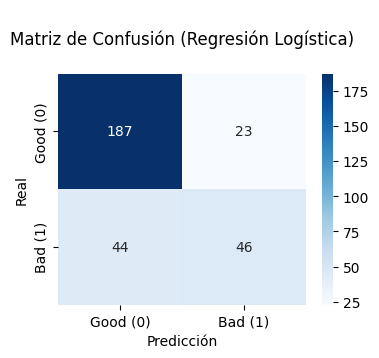

In [81]:
# Escalamos las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo logístico (multinomial)
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)

# Reporte de métricas
print("\nReporte de Clasificación (Regresión Logística):\n\n", classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Regresión Logística)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

El modelo logístico:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.89

* Debe mejorar clasificando malos solicitantes: Recall Medio = 0.51

**4.2. Regularización con Ridge y Lasso**

Se aplican las técnicas de regularización Lasso y Ridge al modelo de Regresión Logística para evitar sobreajuste, mejore la estabilidad de los coeficientes y garantice que el modelo logístico generalice adecuadamente.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Reporte de Clasificación (Ridge - L2):

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       210
           1       0.67      0.51      0.58        90

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



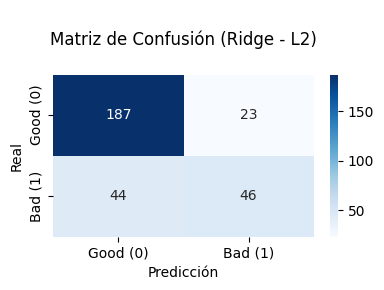

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Reporte de Clasificación (Lasso - L1):

               precision    recall  f1-score   support

           0       0.81      0.89      0.85       210
           1       0.66      0.50      0.57        90

    accuracy                           0.77       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.76      0.77      0.76       300



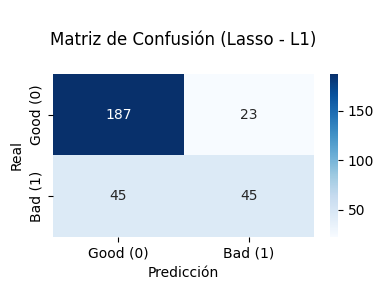

In [82]:
# Modelo con Ridge (L2)
log_reg_ridge = LogisticRegression(
    penalty='l2',          # Regularización Ridge
    solver='lbfgs',        # Compatible con L2
    multi_class='multinomial',
    C=1.0,                 # Inverso de la regularización (más bajo = más fuerte)
    max_iter=1000)

log_reg_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = log_reg_ridge.predict(X_test_scaled)

print("Reporte de Clasificación (Ridge - L2):\n\n", classification_report(y_test, y_pred_ridge))

# Matriz de Confusión - Ridge
cm_ridge = confusion_matrix(y_test, y_pred_ridge)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Ridge - L2)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Modelo con Lasso (L1)
log_reg_lasso = LogisticRegression(
    penalty='l1',          # Regularización Lasso
    solver='saga',         # Necesario para L1
    multi_class='multinomial',
    C=1.0,
    max_iter=2000)

log_reg_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = log_reg_lasso.predict(X_test_scaled)

print("\nReporte de Clasificación (Lasso - L1):\n\n", classification_report(y_test, y_pred_lasso))

# Matriz de Confusión - Lasso
cm_lasso = confusion_matrix(y_test, y_pred_lasso)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Lasso - L1)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Al igual que el modelo de Regresión Logística, con las técnicas de Ridge y Lasso:

* Funciona bien clasificando buenos solicitantes: Recall ALto = 0.89

* Debe mejorar clasificando malos solicitantes: Recall Medio y Bajo = 0.51 y 0.50

**4.3. Comparación de los Modelos Regresión Logística, Ridge y Lasso**


================ TABLA COMPARATIVA ================

                Modelo  Accuracy  Precision    Recall        F1       AUC
0  Regresión Logística  0.776667   0.666667  0.511111  0.578616  0.802593
1           Ridge (L2)  0.776667   0.666667  0.511111  0.578616  0.802593
2           Lasso (L1)  0.773333   0.661765  0.500000  0.569620  0.802275




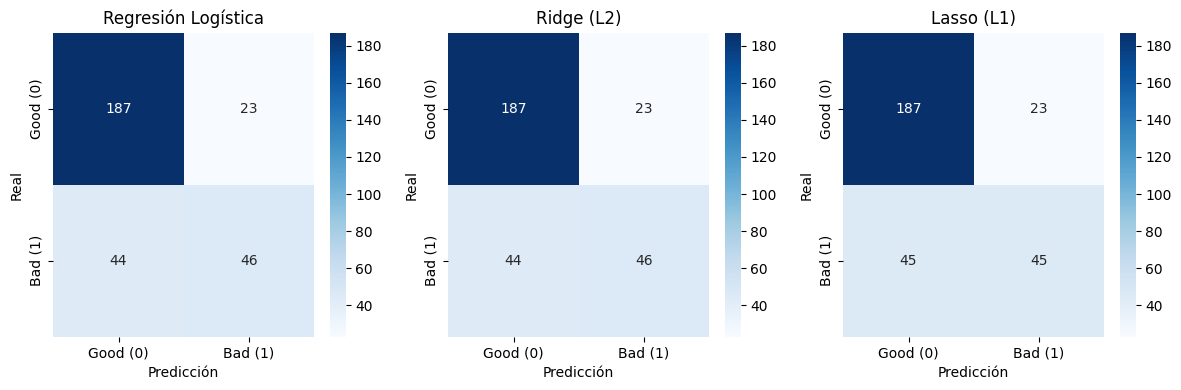

In [83]:
# Modelos entrenados
modelos = {
    "Regresión Logística": log_reg,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso}

# Tabla de Comparación
resultados = []

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])

tabla_modelos = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print("\n================ TABLA COMPARATIVA ================\n")
print(tabla_modelos)
print("\n")

# Matrices de Confusión

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, (nombre, modelo) in zip(axes, modelos.items()):
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'],
                ax=ax)
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

Los modelos Regresión Logística, Ridge y Lasso dan resultados similares.

In [84]:
coef = pd.Series(log_reg_lasso.coef_[0], index=X.columns.tolist())

variables_eliminadas = coef[coef == 0].index.tolist()

print("Variables eliminadas por Lasso:")
print(variables_eliminadas)

Variables eliminadas por Lasso:
[]


Lasso no está eliminando variables, por lo cual se presume que la selección de variables fue buena y/o no hay multicolinealidad.

**4.4. Árbol de Decisión**

Se utiliza un modelo de Árbol de Decisión con el fin de identificar qué variables y umbrales diferencian mejor a los solicitantes "good" y "bad".


Reporte de Clasificación (Árbol de Decisión)

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       210
           1       0.56      0.41      0.47        90

    accuracy                           0.73       300
   macro avg       0.67      0.64      0.64       300
weighted avg       0.71      0.73      0.71       300

Accuracy: 0.7267
Precision: 0.5606
Recall: 0.4111
F1-score: 0.4744
AUC: 0.7457


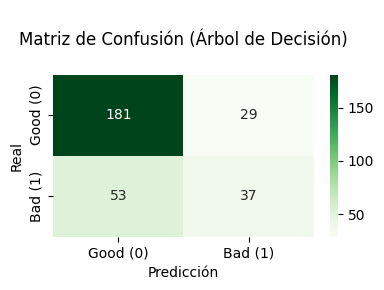


Importancia de Variables (Árbol de Decisión)

                                             Variable  Importancia
0                 checking_status_no checking account     0.361923
3                                       credit_amount     0.203713
2                                            duration     0.189607
5                                    savings_< 100 DM     0.110740
4                                    installment_rate     0.050113
7   credit_history_critical account / other credit...     0.036536
10                                 purpose_car (used)     0.025400
6                savings_unknown / no savings account     0.021969
1                              checking_status_< 0 DM     0.000000
8     credit_history_no credits taken / all paid duly     0.000000
9                            purpose_radio/television     0.000000


In [85]:
x_tree = X
y_tree = y

# Split SOLO para el árbol (sin escalar)
Xtr_tree, Xte_tree, ytr_tree, yte_tree = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42, stratify=y_tree)

# Modelo
arbol = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42)

# Entrenamiento
arbol.fit(Xtr_tree, ytr_tree)

# Predicciones
y_pred_tree = arbol.predict(Xte_tree)
y_proba_tree = arbol.predict_proba(Xte_tree)[:, 1]

# Métricas
print("\nReporte de Clasificación (Árbol de Decisión)\n")
print(classification_report(yte_tree, y_pred_tree))

accuracy = accuracy_score(yte_tree, y_pred_tree)
precision = precision_score(yte_tree, y_pred_tree)
recall = recall_score(yte_tree, y_pred_tree)
f1 = f1_score(yte_tree, y_pred_tree)
auc = roc_auc_score(yte_tree, y_proba_tree)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Matriz de Confusión
cm_tree = confusion_matrix(yte_tree, y_pred_tree)

plt.figure(figsize=(4,3))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (Árbol de Decisión)\n")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Importancia de variables
importances = pd.DataFrame({
    "Variable": X_tree.columns,
    "Importancia": arbol.feature_importances_
}).sort_values("Importancia", ascending=False)

print("\nImportancia de Variables (Árbol de Decisión)\n")
print(importances)

El Árbol de Decisión:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.86

* Debe mejorar clasificando malos solicitantes: Recall Bajo = 0.41

**4.5. Comparación de los Modelos Regresión Logística, Ridge, Lasso y Árbol de Decisión**

                Modelo  Accuracy  Precision    Recall        F1       AUC
0  Regresión Logística  0.776667   0.666667  0.511111  0.578616  0.802593
1           Ridge (L2)  0.776667   0.666667  0.511111  0.578616  0.802593
2           Lasso (L1)  0.773333   0.661765  0.500000  0.569620  0.802275
3    Árbol de Decisión  0.726667   0.560606  0.411111  0.474359  0.745741




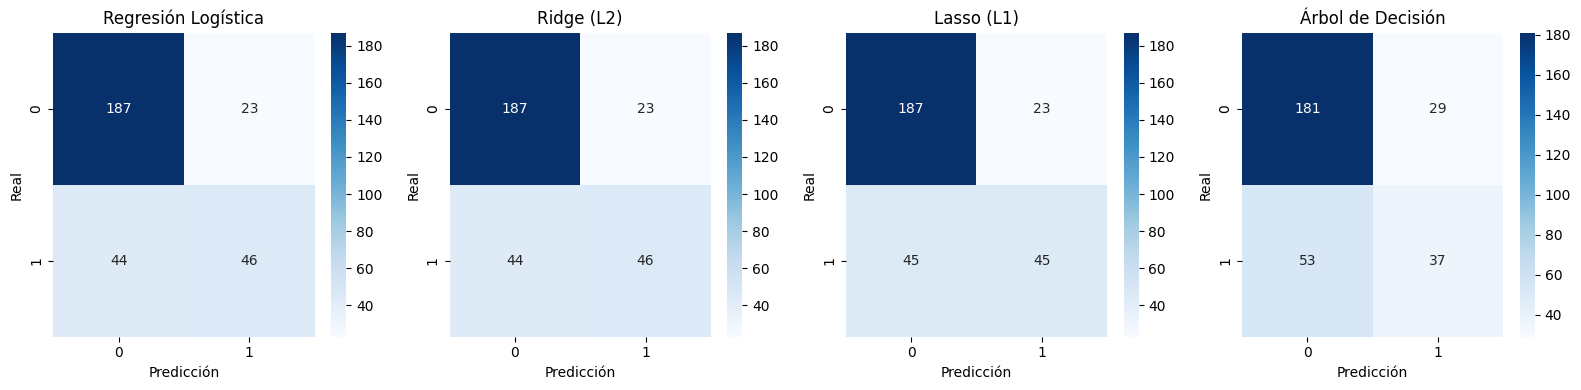

In [86]:
modelos = {
    "Regresión Logística": log_reg,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol}

inputs = {
    "Regresión Logística": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test}

resultados = []
conf_matrices = {}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

# Tabla comparativa
tabla_modelos = pd.DataFrame(resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print(tabla_modelos)

print("\n")

# Matrices de Confusión
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

Hasta el momento el mejor modelo es **Regresión Logística** pero debe mejorar clasificando malos solicitantes (recall de 0.51).

**4.6. XGBoost**


Reporte de Clasificación (XGBoost)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       210
           1       0.57      0.47      0.51        90

    accuracy                           0.73       300
   macro avg       0.68      0.66      0.66       300
weighted avg       0.72      0.73      0.73       300

AUC: 0.7574338624338623


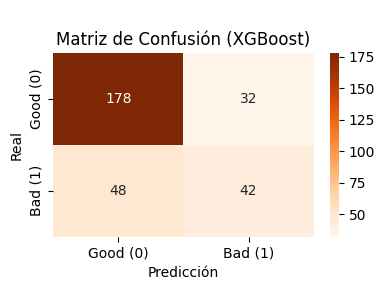


Importancia de Variables (XGBoost)

                                             Variable  Importancia
0                 checking_status_no_checking_account     0.247805
10                                   purpose_car_used     0.085297
7   credit_history_critical_account___other_credit...     0.084832
1                            checking_status_lt__0_DM     0.082679
8     credit_history_no_credits_taken___all_paid_duly     0.079342
3                                       credit_amount     0.076702
5                                  savings_lt__100_DM     0.074655
6                savings_unknown___no_savings_account     0.074380
2                                            duration     0.071908
9                            purpose_radio_television     0.064144
4                                    installment_rate     0.058255


In [87]:
# Limpia Nombres para XGBOOST
df_xgb = X.copy()

df_xgb.columns = (
    df_xgb.columns
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("<", "lt_")
    .str.replace(">", "gt_")
    .str.replace("?", "q_")
    .str.replace("(", "")
    .str.replace(")", ""))

# Train-test con las nuevas columnas
X_train_xgb = df_xgb.loc[X_train.index]
X_test_xgb  = df_xgb.loc[X_test.index]

# Modelo XGBOOST
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

xgb_model.fit(X_train_xgb, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_xgb)
y_proba_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]

# Métricas
print("\nReporte de Clasificación (XGBoost)\n")
print(classification_report(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_proba_xgb))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("\nMatriz de Confusión (XGBoost)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Importancia de las Variables
importances = pd.DataFrame({
    "Variable": X_train_xgb.columns,
    "Importancia": xgb_model.feature_importances_
}).sort_values("Importancia", ascending=False)

print("\nImportancia de Variables (XGBoost)\n")
print(importances)

El XGBoost:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.85

* Debe mejorar clasificando malos solicitantes: Recall Bajo = 0.47

**4.7. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión y XGBoost**

                    Modelo  Accuracy  Precision    Recall        F1       AUC
0      Regresión Logística  0.776667   0.666667  0.511111  0.578616  0.802593
1               Ridge (L2)  0.776667   0.666667  0.511111  0.578616  0.802593
2               Lasso (L1)  0.773333   0.661765  0.500000  0.569620  0.802275
3        Árbol de Decisión  0.726667   0.560606  0.411111  0.474359  0.745741
4  XGBoost (sin balancear)  0.733333   0.567568  0.466667  0.512195  0.757434




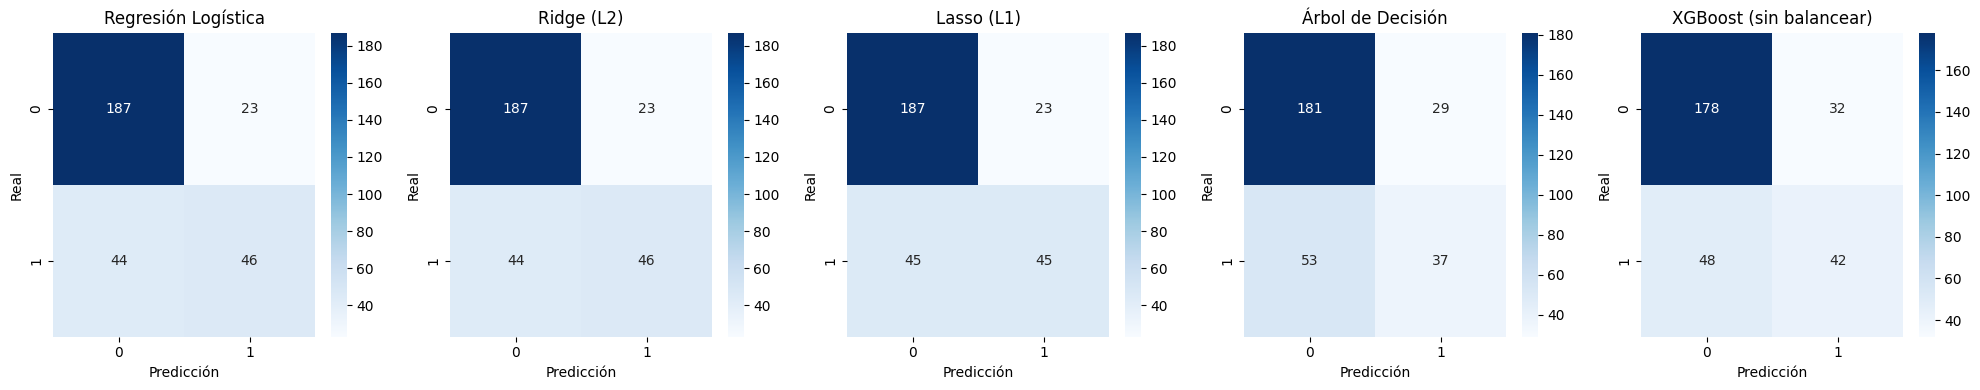

In [88]:
modelos = {
    "Regresión Logística": log_reg,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "XGBoost (sin balancear)": xgb_model}

inputs = {
    "Regresión Logística": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "XGBoost (sin balancear)": X_test_xgb}

resultados = []
conf_matrices = {}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

# Tabla comparativa
tabla_modelos = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print(tabla_modelos)
print("\n")

# Matrices de Confusión
fig, axes = plt.subplots(1, len(conf_matrices), figsize=(4*len(conf_matrices), 4))

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

Hasta el momento el mejor modelo continúa siendo **Regresión Logística** pero debe mejorar clasificando malos solicitantes (recall de 0.51).

**4.8. XGBoost Balanceado**

Se utiliza un XGBoost balanceado con el fin de buscar un mayor recall.

scale_pos_weight = 2.3333333333333335

Reporte de Clasificación (XGBoost balanceado)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       210
           1       0.56      0.60      0.58        90

    accuracy                           0.74       300
   macro avg       0.69      0.70      0.70       300
weighted avg       0.75      0.74      0.74       300

Accuracy : 0.7400
Precision: 0.5625
Recall   : 0.6000
F1-score : 0.5806
AUC      : 0.7522


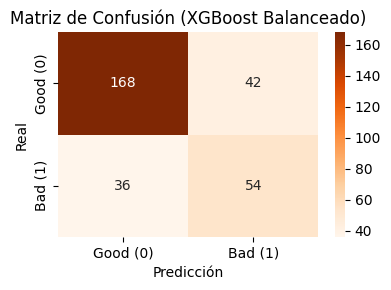

In [92]:
# Copia de X y limpieza de nombres
df_xgb = X.copy()

df_xgb.columns = (
    df_xgb.columns
        .str.replace(" ", "_")
        .str.replace("/", "_")
        .str.replace("<", "lt_")
        .str.replace(">", "gt_")
        .str.replace("(", "")
        .str.replace(")", "")
)

# Reuso de los mismos índices de train/test
X_train_xgb = df_xgb.loc[X_train.index]
X_test_xgb  = df_xgb.loc[X_test.index]

# Cálculo de scale_pos_weight para balanceo
pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)
scale_pos_weight = neg / pos
print("scale_pos_weight =", scale_pos_weight)

# Modelo XGBoost Balanceado
xgb_bal = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Entrenamiento
xgb_bal.fit(X_train_xgb, y_train)

# Predicciones
y_pred_xgb  = xgb_bal.predict(X_test_xgb)
y_proba_xgb = xgb_bal.predict_proba(X_test_xgb)[:, 1]

print("\nReporte de Clasificación (XGBoost balanceado)\n")
print(classification_report(y_test, y_pred_xgb))

acc  = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec  = recall_score(y_test, y_pred_xgb)
f1   = f1_score(y_test, y_pred_xgb)
auc  = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")

# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("Matriz de Confusión (XGBoost Balanceado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

El XGBoost Balanceado:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.80

* Mejoró clasificando malos solicitantes respecto a los otros modelos: Recall Medio = 0.60

**4.9. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión, XGBoost y XGBoost Balanceado**

                Modelo  Accuracy  Precision    Recall        F1       AUC
0  Regresión Logística  0.776667   0.666667  0.511111  0.578616  0.802593
1           Ridge (L2)  0.776667   0.666667  0.511111  0.578616  0.802593
2           Lasso (L1)  0.773333   0.661765  0.500000  0.569620  0.802275
3    Árbol de Decisión  0.726667   0.560606  0.411111  0.474359  0.745741
4              XGBoost  0.733333   0.567568  0.466667  0.512195  0.757434
5   XGBoost Balanceado  0.740000   0.562500  0.600000  0.580645  0.752222




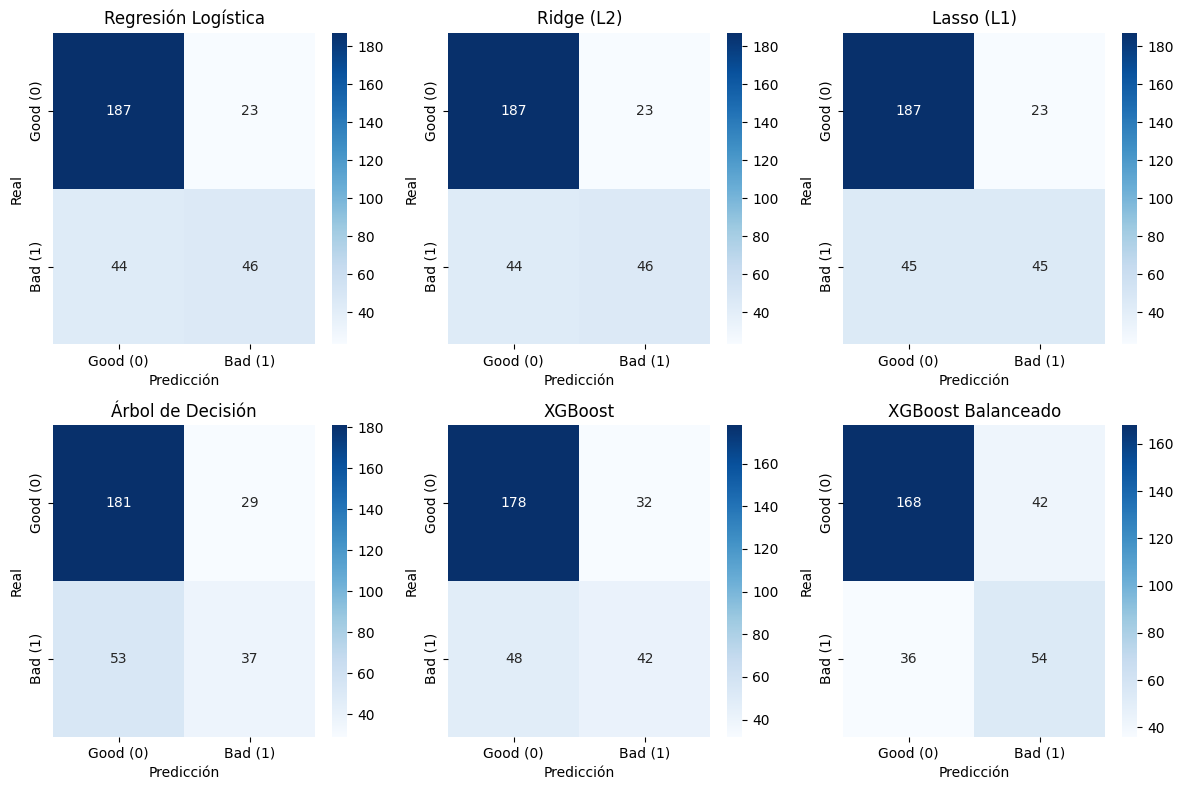

In [93]:
modelos = {
    "Regresión Logística": log_reg,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "XGBoost": xgb_model,
    "XGBoost Balanceado": xgb_bal}

inputs = {
    "Regresión Logística": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "XGBoost": X_test_xgb,
    "XGBoost Balanceado": X_test_xgb}

resultados = []
conf_matrices = {}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred  = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

# Tabla comparativa
tabla_modelos = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print(tabla_modelos)
print("\n")

# Matrices de Confusión
n_modelos = len(conf_matrices)
rows = 2
cols = math.ceil(n_modelos / rows)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'])
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

# Si sobran axes (por ejemplo 5 modelos en una rejilla 2x3)
for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Ahora el mejor modelo es **XGBoost Balanceado** pero aún debe mejorar clasificando malos solicitantes (recall de 0.60).

**4.10. XGBoost Balanceado Optimizado**

Se busca el mejor umbral para XGBoost balanceado, con el fin de mejorar el recall de la clase "Bad" (1) sin tener que reentrenar el modelo.

In [96]:
umbrales = np.arange(0.05, 1.00, 0.01)

mejor_umbral = 0
mejor_f1 = 0
datos = []

for u in umbrales:
    y_pred_u = (y_proba_xgb >= u).astype(int)

    prec = precision_score(y_test, y_pred_u)
    rec  = recall_score(y_test, y_pred_u)
    f1   = f1_score(y_test, y_pred_u)

    datos.append([u, prec, rec, f1])

    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_umbral = u

tabla_umbral = pd.DataFrame(datos, columns=["Umbral", "Precision", "Recall", "F1"])

print("Mejor F1:", mejor_f1)
print("Mejor Umbral:", mejor_umbral)
print("\n")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

tabla_umbral

Mejor F1: 0.5925925925925926
Mejor Umbral: 0.4800000000000001




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Umbral,Precision,Recall,F1
0,0.05,0.344000,0.955556,0.505882
1,0.06,0.346939,0.944444,0.507463
2,0.07,0.358974,0.933333,0.518519
3,0.08,0.365217,0.933333,0.525000
4,0.09,0.366071,0.911111,0.522293
5,0.10,0.373272,0.900000,0.527687
6,0.11,0.378505,0.900000,0.532895
7,0.12,0.382075,0.900000,0.536424
8,0.13,0.393204,0.900000,0.547297
9,0.14,0.398010,0.888889,0.549828


El mejor umbral es **0,48** de acuerdo al mejor F1 (0,59).

🔹 Reporte de Clasificación (XGBoost Balanceado Optimizado con Umbral de 0.4800000000000001 )

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       210
           1       0.57      0.62      0.59        90

    accuracy                           0.74       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.75      0.74      0.75       300

Accuracy : 0.7433
Precision: 0.5657
Recall   : 0.6222
F1-score : 0.5926
AUC      : 0.7522




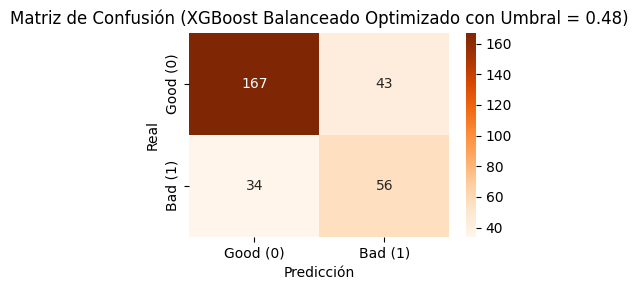

In [98]:
# Predicción con el umbral óptimo
y_pred_opt = (y_proba_xgb >= mejor_umbral).astype(int)

# Reporte de Clasificación
print("🔹 Reporte de Clasificación (XGBoost Balanceado Optimizado con Umbral de", mejor_umbral, ")\n")
print(classification_report(y_test, y_pred_opt))

# Métricas
acc_opt  = accuracy_score(y_test, y_pred_opt)
prec_opt = precision_score(y_test, y_pred_opt)
rec_opt  = recall_score(y_test, y_pred_opt)
f1_opt   = f1_score(y_test, y_pred_opt)
auc_opt  = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy : {acc_opt:.4f}")
print(f"Precision: {prec_opt:.4f}")
print(f"Recall   : {rec_opt:.4f}")
print(f"F1-score : {f1_opt:.4f}")
print(f"AUC      : {auc_opt:.4f}")
print("\n")

# Matriz de confusión
cm_opt = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(4,3))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title(f"Matriz de Confusión (XGBoost Balanceado Optimizado con Umbral = {mejor_umbral:.2f})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

El XGBoost Balanceado Optimizado con Umbral de 0,48:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.80

* Mejoró clasificando malos solicitantes respecto a los otros modelos: Recall Medio = 0.62

**4.11. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión, XGBoost, XGBoost Balanceado y XGBoost Balanceado Optimizado**

                             Modelo  Accuracy  Precision    Recall        F1  \
0               Regresión Logística  0.776667   0.666667  0.511111  0.578616   
1                        Ridge (L2)  0.776667   0.666667  0.511111  0.578616   
2                        Lasso (L1)  0.773333   0.661765  0.500000  0.569620   
3                 Árbol de Decisión  0.726667   0.560606  0.411111  0.474359   
4                           XGBoost  0.733333   0.567568  0.466667  0.512195   
5                XGBoost Balanceado  0.740000   0.562500  0.600000  0.580645   
6  XGBoost Bal. Optimizado (u=0.48)  0.743333   0.565657  0.622222  0.592593   

        AUC  
0  0.802593  
1  0.802593  
2  0.802275  
3  0.745741  
4  0.757434  
5  0.752222  
6  0.752222  




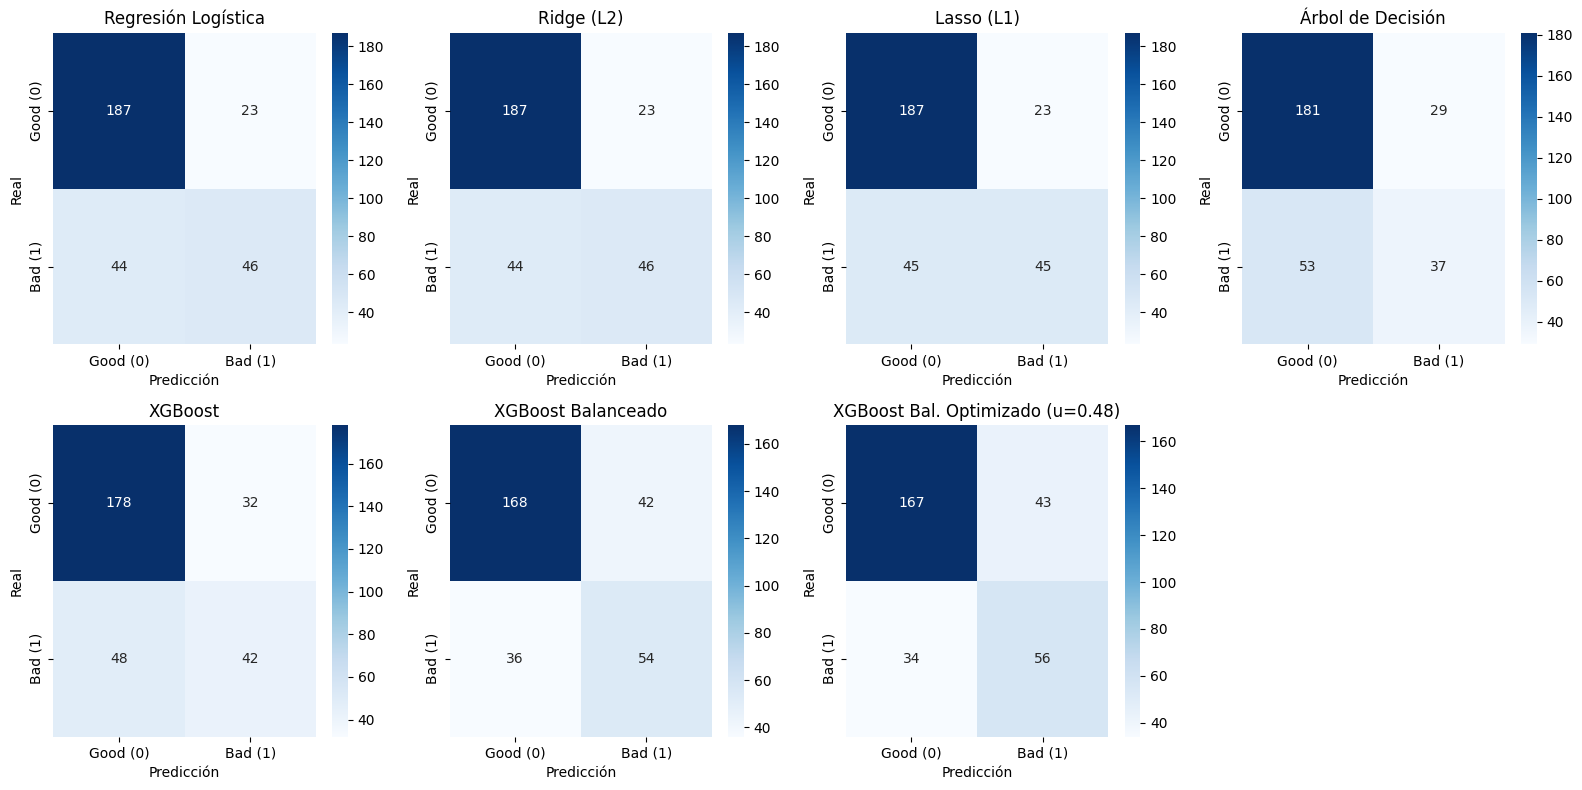

In [99]:
# Modelos con umbral "normal" 0.5
modelos = {
    "Regresión Logística": log_reg,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "XGBoost": xgb_model,
    "XGBoost Balanceado": xgb_bal}

inputs = {
    "Regresión Logística": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "XGBoost": X_test_xgb,
    "XGBoost Balanceado": X_test_xgb}

resultados = []
conf_matrices = {}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred  = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

# XGBoost Balanceado Optimizado
mejor_umbral = 0.48

# Probabilidades del modelo balanceado
y_proba_bal = xgb_bal.predict_proba(X_test_xgb)[:, 1]

# Predicción con umbral optimizado
y_pred_bal_opt = (y_proba_bal >= mejor_umbral).astype(int)

# Métricas
acc  = accuracy_score(y_test, y_pred_bal_opt)
prec = precision_score(y_test, y_pred_bal_opt)
rec  = recall_score(y_test, y_pred_bal_opt)
f1   = f1_score(y_test, y_pred_bal_opt)
auc  = roc_auc_score(y_test, y_proba_bal)   # AUC no depende del umbral

nombre_opt = f"XGBoost Bal. Optimizado (u={mejor_umbral:.2f})"

resultados.append([nombre_opt, acc, prec, rec, f1, auc])
conf_matrices[nombre_opt] = confusion_matrix(y_test, y_pred_bal_opt)

# Tabla comparativa
tabla_modelos = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print(tabla_modelos)
print("\n")

# Matrices de Confusión
n_modelos = len(conf_matrices)
rows = 2
cols = math.ceil(n_modelos / rows)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'])
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

# Si sobran axes (por ejemplo 7 modelos en una rejilla 2x4)
for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Ahora el mejor modelo es **XGBoost Balanceado Optimizado** pero aún debe mejorar clasificando malos solicitantes (recall de 0.62).

**4.12. Regresión Logística Balanceada**

Se utiliza un modelo de Regresión Logística Balanceada con el fin de buscar un mayor recall.


Reporte de Clasificación (Regresión Logística Balanceado):

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       210
           1       0.52      0.77      0.62        90

    accuracy                           0.72       300
   macro avg       0.70      0.73      0.70       300
weighted avg       0.77      0.72      0.73       300



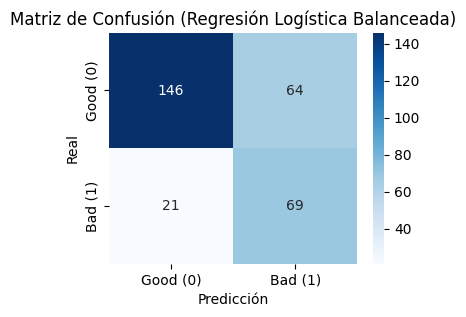

In [100]:
# Modelo Logístico balanceado
log_reg_bal = LogisticRegression(
    class_weight='balanced',
    solver='lbfgs',
    max_iter=2000)

log_reg_bal.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg_bal.predict(X_test_scaled)

print("\nReporte de Clasificación (Regresión Logística Balanceada):\n")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Good (0)", "Bad (1)"],
            yticklabels=["Good (0)", "Bad (1)"])
plt.title("Matriz de Confusión (Regresión Logística Balanceada)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

La Regresión Logística Balanceada:

* Desmejoró clasificando buenos solicitantes respecto a otros modelos: Recall Medio = 0.70

* Mejoró clasificando malos solicitantes respecto a los otros modelos: Recall Alto = 0.77

**4.13. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión, XGBoost, XGBoost Balanceado, XGBoost Balanceado Optimizado y Regresión Logística Balanceada**

                       Modelo  Accuracy  Precision    Recall        F1  \
0         Regresión Logística  0.776667   0.666667  0.511111  0.578616   
1   Reg. Logística Balanceada  0.716667   0.518797  0.766667  0.618834   
2                  Ridge (L2)  0.776667   0.666667  0.511111  0.578616   
3                  Lasso (L1)  0.773333   0.661765  0.500000  0.569620   
4           Árbol de Decisión  0.726667   0.560606  0.411111  0.474359   
5                     XGBoost  0.733333   0.567568  0.466667  0.512195   
6          XGBoost Balanceado  0.740000   0.562500  0.600000  0.580645   
7  XGBoost Bal. Opt. (u=0.48)  0.743333   0.565657  0.622222  0.592593   

        AUC  
0  0.802593  
1  0.806190  
2  0.802593  
3  0.802275  
4  0.745741  
5  0.757434  
6  0.752222  
7  0.752222  




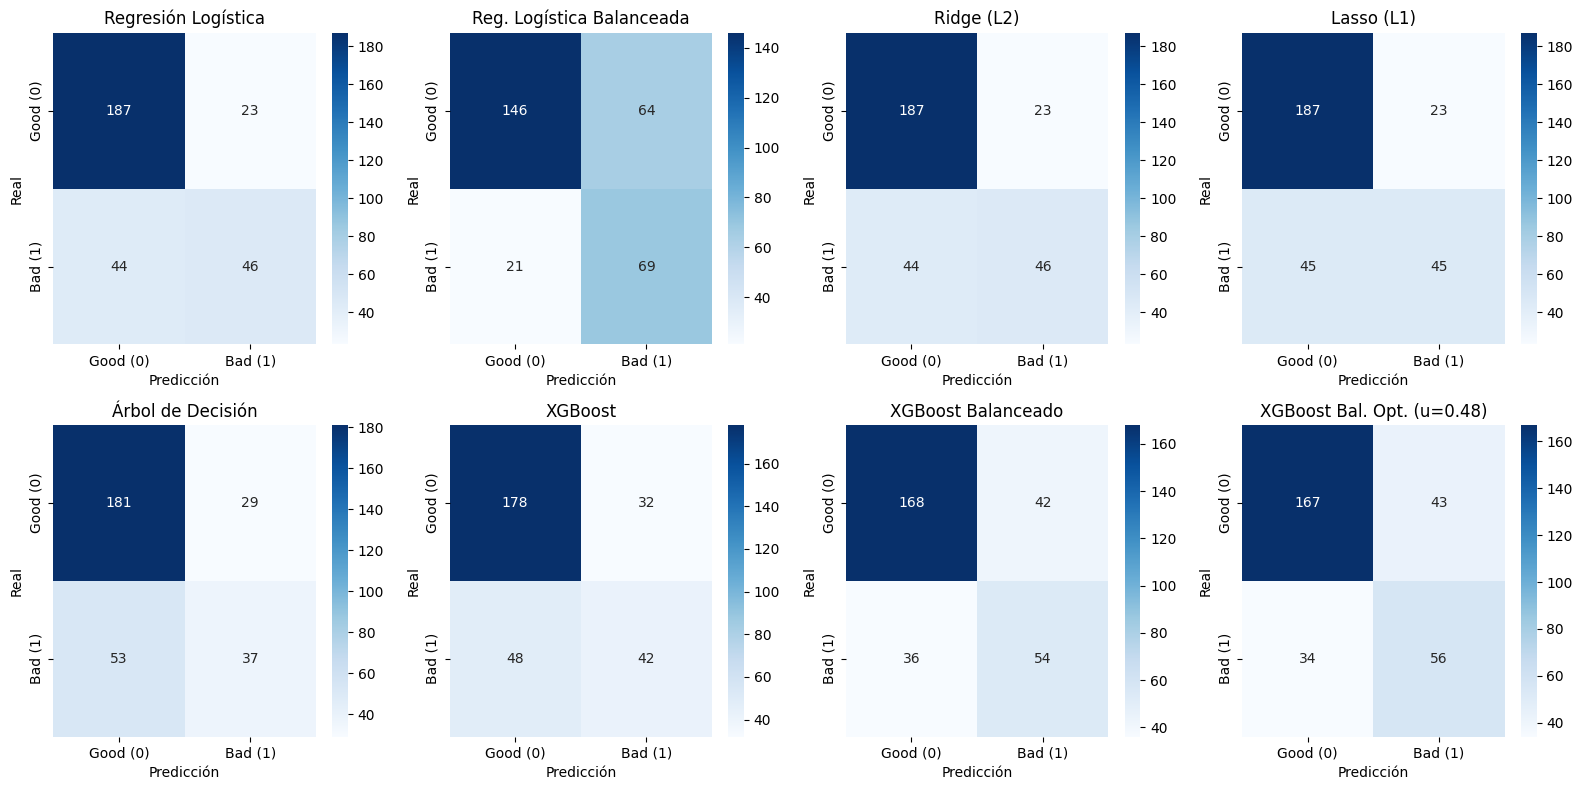

In [103]:
#  Modelos con umbral "normal"
modelos = {
    "Regresión Logística": log_reg,
    "Reg. Logística Balanceada": log_reg_bal,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "XGBoost": xgb_model,
    "XGBoost Balanceado": xgb_bal}

inputs = {
    "Regresión Logística": X_test_scaled,
    "Reg. Logística Balanceada": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "XGBoost": X_test_xgb,
    "XGBoost Balanceado": X_test_xgb}

resultados = []
conf_matrices = {}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred  = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

#  XGBoost Balanceado Optimizada
mejor_umbral = 0.48

y_proba_bal = xgb_bal.predict_proba(X_test_xgb)[:, 1]
y_pred_bal_opt = (y_proba_bal >= mejor_umbral).astype(int)

acc  = accuracy_score(y_test, y_pred_bal_opt)
prec = precision_score(y_test, y_pred_bal_opt)
rec  = recall_score(y_test, y_pred_bal_opt)
f1   = f1_score(y_test, y_pred_bal_opt)
auc  = roc_auc_score(y_test, y_proba_bal)

nombre_opt = f"XGBoost Bal. Opt. (u={mejor_umbral:.2f})"

resultados.append([nombre_opt, acc, prec, rec, f1, auc])
conf_matrices[nombre_opt] = confusion_matrix(y_test, y_pred_bal_opt)

#  Tabla comparativa final
tabla_modelos = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print(tabla_modelos)
print("\n")

#  Matrices de confusión
n_modelos = len(conf_matrices)
rows = 2
cols = math.ceil(n_modelos / rows)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'])
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Ahora el mejor modelo es **Regresión Logística Balanceada** con un recall de 0.77.

**4.14. Regresión Logística Balanceada Optimizada**

Se busca el mejor umbral para Regresión Logística Balanceada, con el fin de mejorar el recall de la clase "Bad" (1) sin tener que reentrenar el modelo.

In [107]:
# Probabilidades del modelo Logístico Balanceado
y_proba_log_bal = log_reg_bal.predict_proba(X_test_scaled)[:, 1]

# Búsqueda de mejor umbral optimizando F1
umbrales = np.arange(0.05, 1.00, 0.01)

mejor_umbral_log = 0
mejor_f1_log = 0
datos_log = []

for u in umbrales:
    y_pred_u = (y_proba_log_bal >= u).astype(int)

    prec = precision_score(y_test, y_pred_u)
    rec  = recall_score(y_test, y_pred_u)
    f1   = f1_score(y_test, y_pred_u)

    datos_log.append([u, prec, rec, f1])

    if f1 > mejor_f1_log:
        mejor_f1_log = f1
        mejor_umbral_log = u

#Tabla
tabla_umbral_log = pd.DataFrame(
    datos_log,
    columns=["Umbral", "Precision", "Recall", "F1"])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Mejor F1 (Log. Balanceada):", mejor_f1_log)
print("\nMejor Umbral (Log. Balanceada):", mejor_umbral_log, "\n")

tabla_umbral_log

Mejor F1 (Log. Balanceada): 0.6528497409326425

Mejor Umbral (Log. Balanceada): 0.5900000000000002 



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

,Umbral,Precision,Recall,F1
0,0.05,0.305085,1.000000,0.467532
1,0.06,0.309278,1.000000,0.472441
2,0.07,0.311419,1.000000,0.474934
3,0.08,0.312500,1.000000,0.476190
4,0.09,0.315789,1.000000,0.480000
5,0.10,0.318021,1.000000,0.482574
6,0.11,0.323741,1.000000,0.489130
7,0.12,0.327273,1.000000,0.493151
8,0.13,0.330882,1.000000,0.497238
9,0.14,0.334572,1.000000,0.501393


El mejor umbral es **0,59** de acuerdo al mejor F1 (0,65).

Reporte de Clasificación (Reg. Log. Balanceada con Umbral = 0.59)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       210
           1       0.61      0.70      0.65        90

    accuracy                           0.78       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.79      0.78      0.78       300

Accuracy : 0.7767
Precision: 0.6117
Recall   : 0.7000
F1-score : 0.6528
AUC      : 0.8062



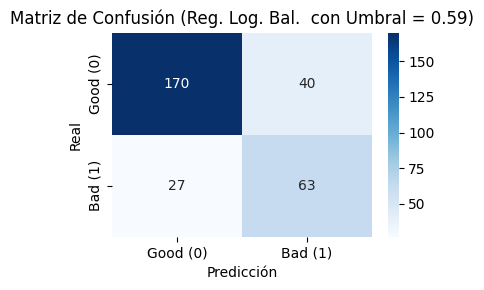

In [111]:
# Predicción con el mejor umbral encontrado
y_pred_log_opt = (y_proba_log_bal >= mejor_umbral_log).astype(int)

#  Reporte de Clasificación
print(f"Reporte de Clasificación (Reg. Log. Balanceada con Umbral = {mejor_umbral_log:.2f})\n")
print(classification_report(y_test, y_pred_log_opt))

#  Métricas
acc_opt  = accuracy_score(y_test, y_pred_log_opt)
prec_opt = precision_score(y_test, y_pred_log_opt)
rec_opt  = recall_score(y_test, y_pred_log_opt)
f1_opt   = f1_score(y_test, y_pred_log_opt)
auc_opt  = roc_auc_score(y_test, y_proba_log_bal)  # AUC no depende del umbral

print(f"Accuracy : {acc_opt:.4f}")
print(f"Precision: {prec_opt:.4f}")
print(f"Recall   : {rec_opt:.4f}")
print(f"F1-score : {f1_opt:.4f}")
print(f"AUC      : {auc_opt:.4f}\n")

#  Matriz de confusión
cm_log_opt = confusion_matrix(y_test, y_pred_log_opt)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_log_opt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title(f"Matriz de Confusión (Reg. Log. Bal.  con Umbral = {mejor_umbral_log:.2f})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

La Regresión Logística Balanceada Optimizada con Umbral de 0,59:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.81

* Tiene buena clasificación de malos solicitantes: Recall Medio = 0.70

**4.15. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión, XGBoost, XGBoost Balanceado, XGBoost Balanceado Optimizado, Regresión Logística Balanceada y Regresión Logística Balanceada Optimizada**

                         Modelo  Accuracy  Precision    Recall        F1  \
0           Regresión Logística  0.776667   0.666667  0.511111  0.578616   
1     Reg. Logística Balanceada  0.716667   0.518797  0.766667  0.618834   
2                    Ridge (L2)  0.776667   0.666667  0.511111  0.578616   
3                    Lasso (L1)  0.773333   0.661765  0.500000  0.569620   
4             Árbol de Decisión  0.726667   0.560606  0.411111  0.474359   
5                       XGBoost  0.733333   0.567568  0.466667  0.512195   
6            XGBoost Balanceado  0.740000   0.562500  0.600000  0.580645   
7  Reg. Log. Bal. Opt. (u=0.59)  0.776667   0.611650  0.700000  0.652850   
8    XGBoost Bal. Opt. (u=0.48)  0.743333   0.565657  0.622222  0.592593   

        AUC  
0  0.802593  
1  0.806190  
2  0.802593  
3  0.802275  
4  0.745741  
5  0.757434  
6  0.752222  
7  0.806190  
8  0.752222  




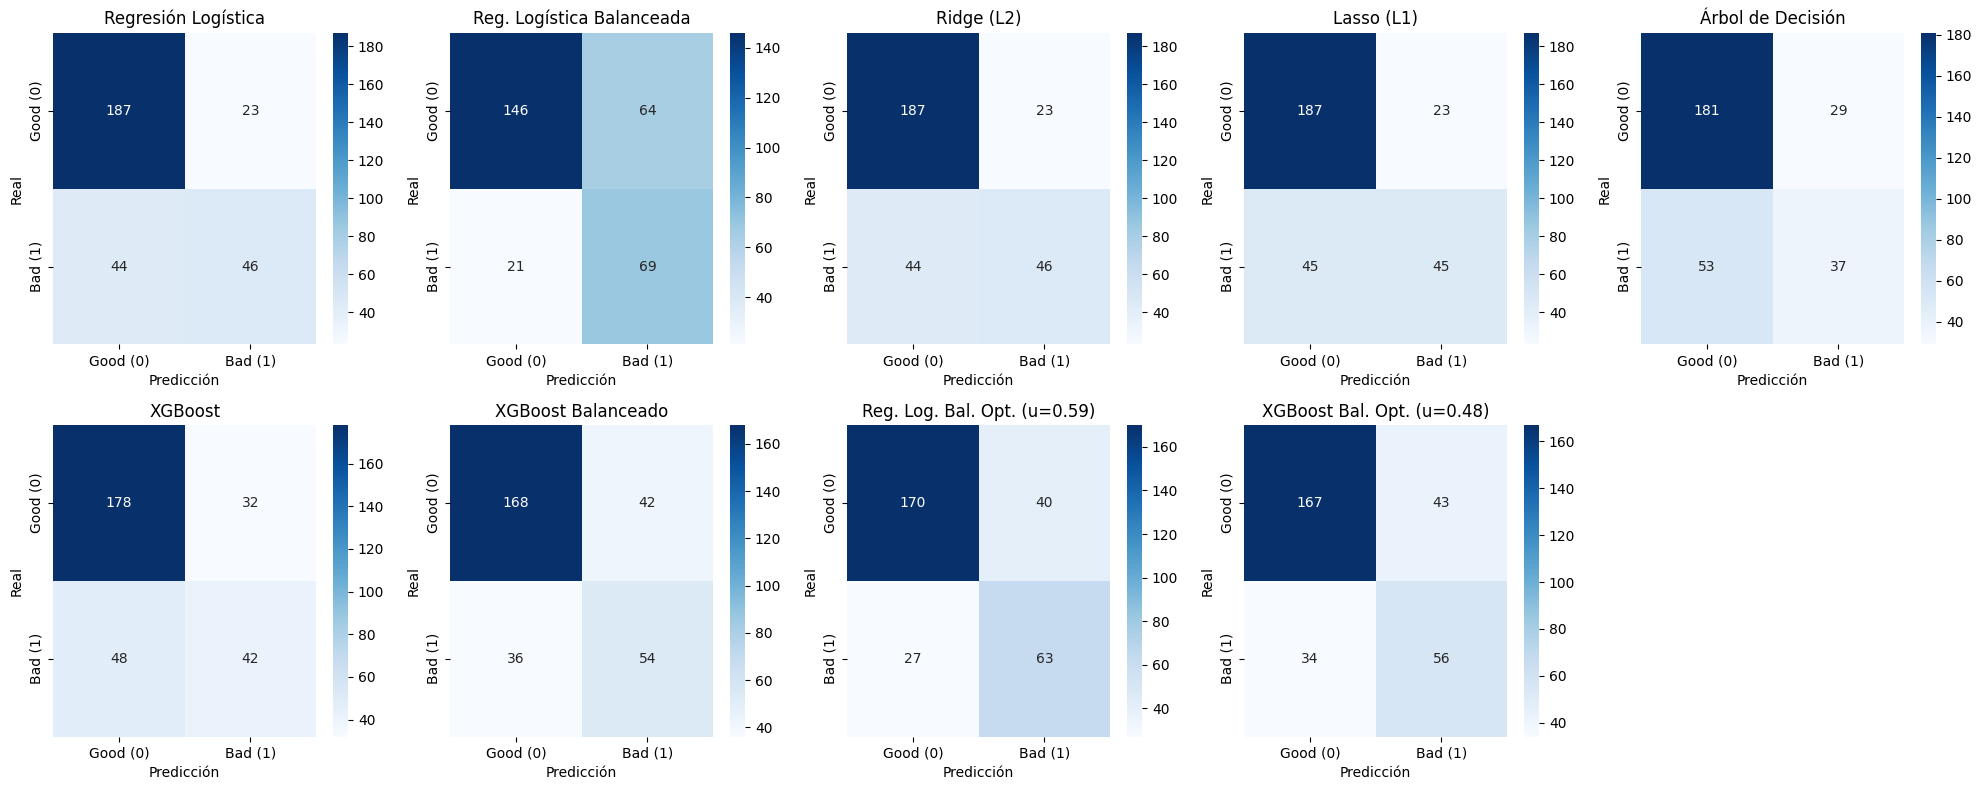

In [113]:
#  Modelos con umbral "normal"

modelos = {
    "Regresión Logística": log_reg,
    "Reg. Logística Balanceada": log_reg_bal,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "XGBoost": xgb_model,
    "XGBoost Balanceado": xgb_bal}

inputs = {
    "Regresión Logística": X_test_scaled,
    "Reg. Logística Balanceada": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "XGBoost": X_test_xgb,
    "XGBoost Balanceado": X_test_xgb}

resultados = []
conf_matrices = {}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred  = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados.append([nombre, acc, prec, rec, f1, auc])
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

#  Regresión Logística Balanceada OPTIMIZADA (umbral)

# y_proba ya la calculaste así:
y_proba_log_bal = log_reg_bal.predict_proba(X_test_scaled)[:, 1]

y_pred_log_opt = (y_proba_log_bal >= mejor_umbral_log).astype(int)

acc  = accuracy_score(y_test, y_pred_log_opt)
prec = precision_score(y_test, y_pred_log_opt)
rec  = recall_score(y_test, y_pred_log_opt)
f1   = f1_score(y_test, y_pred_log_opt)
auc  = roc_auc_score(y_test, y_proba_log_bal)

nombre_opt_log = f"Reg. Log. Bal. Opt. (u={mejor_umbral_log:.2f})"

resultados.append([nombre_opt_log, acc, prec, rec, f1, auc])
conf_matrices[nombre_opt_log] = confusion_matrix(y_test, y_pred_log_opt)


#  XGBoost Balanceado OPTIMIZADO (umbral)

y_proba_bal = xgb_bal.predict_proba(X_test_xgb)[:, 1]
y_pred_bal_opt = (y_proba_bal >= mejor_umbral).astype(int)

acc  = accuracy_score(y_test, y_pred_bal_opt)
prec = precision_score(y_test, y_pred_bal_opt)
rec  = recall_score(y_test, y_pred_bal_opt)
f1   = f1_score(y_test, y_pred_bal_opt)
auc  = roc_auc_score(y_test, y_proba_bal)

nombre_opt_xgb = f"XGBoost Bal. Opt. (u={mejor_umbral:.2f})"

resultados.append([nombre_opt_xgb, acc, prec, rec, f1, auc])
conf_matrices[nombre_opt_xgb] = confusion_matrix(y_test, y_pred_bal_opt)

#  Tabla comparativa final

tabla_modelos = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1", "AUC"])

print(tabla_modelos)
print("\n")

#  Matrices de confusión

n_modelos = len(conf_matrices)
rows = 2
cols = math.ceil(n_modelos / rows)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'])
    ax.set_title(nombre)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

# eliminar ejes sobrantes
for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

El mejor modelo continúa siendo **Regresión Logística Balanceada** con un recall de 0.77.

**4.16. Regresión Logística con SMOTE**

Se utiliza la Regresión Logística con SMOTE teniendo en cuenta que la variable objetivo (target) está desbalanceada, con el fin de encontrar un mejor recall de "bad".

Tamaño original y_train: [490 210]
Tamaño balanceado y_train_sm: [490 490]
Reporte de Clasificación (Reg. Logística con SMOTE)

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       210
           1       0.55      0.76      0.64        90

    accuracy                           0.74       300
   macro avg       0.71      0.74      0.72       300
weighted avg       0.78      0.74      0.75       300

Accuracy : 0.7400
Precision: 0.5484
Recall   : 0.7556
F1-score : 0.6355
AUC      : 0.7947



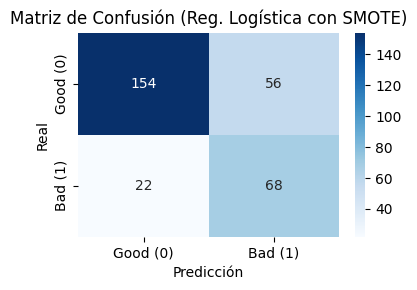

In [117]:
# Aplicar SMOTE solo sobre el Train
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Tamaño original y_train:", np.bincount(y_train))
print("Tamaño balanceado y_train_sm:", np.bincount(y_train_sm))

# Modelo Regresión Logística con datos balanceados por SMOTE
log_reg_smote = LogisticRegression(max_iter=2000, solver='lbfgs')

log_reg_smote.fit(X_train_sm, y_train_sm)

# Probabilidades y predicciones en el Test
y_proba_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]
y_pred_smote  = log_reg_smote.predict(X_test_scaled)

print("Reporte de Clasificación (Regresión Logística con SMOTE)\n")
print(classification_report(y_test, y_pred_smote))

# Métricas
acc_sm  = accuracy_score(y_test, y_pred_smote)
prec_sm = precision_score(y_test, y_pred_smote)
rec_sm  = recall_score(y_test, y_pred_smote)
f1_sm   = f1_score(y_test, y_pred_smote)
auc_sm  = roc_auc_score(y_test, y_proba_smote)

print(f"Accuracy : {acc_sm:.4f}")
print(f"Precision: {prec_sm:.4f}")
print(f"Recall   : {rec_sm:.4f}")
print(f"F1-score : {f1_sm:.4f}")
print(f"AUC      : {auc_sm:.4f}\n")

# Matriz de confusión
cm_sm = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("Matriz de Confusión (Regresión Logística con SMOTE)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

La Regresión Logística con SMOTE:

* Funciona bien clasificando buenos solicitantes: Recall Medio = 0.73

* Tiene buena clasificación de malos solicitantes: Recall Alto = 0.76

**4.17. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión, XGBoost, XGBoost Balanceado, XGBoost Balanceado Optimizado, Regresión Logística Balanceada, Regresión Logística Balanceada Optimizada y Regresión Logística con SMOTE**

                      Modelo  Accuracy  Precision  Recall     F1    AUC
              Reg. Logística    0.7767     0.6667  0.5111 0.5786 0.8026
   Reg. Logística Balanceada    0.7167     0.5188  0.7667 0.6188 0.8062
        Reg. Logística SMOTE    0.7400     0.5484  0.7556 0.6355 0.7947
                  Ridge (L2)    0.7767     0.6667  0.5111 0.5786 0.8026
                  Lasso (L1)    0.7733     0.6618  0.5000 0.5696 0.8023
           Árbol de Decisión    0.7267     0.5606  0.4111 0.4744 0.7457
                     XGBoost    0.7333     0.5676  0.4667 0.5122 0.7574
          XGBoost Balanceado    0.7400     0.5625  0.6000 0.5806 0.7522
Reg. Log. Bal. Opt. (u=0.59)    0.7767     0.6117  0.7000 0.6528 0.8062
  XGBoost Bal. Opt. (u=0.48)    0.7433     0.5657  0.6222 0.5926 0.7522




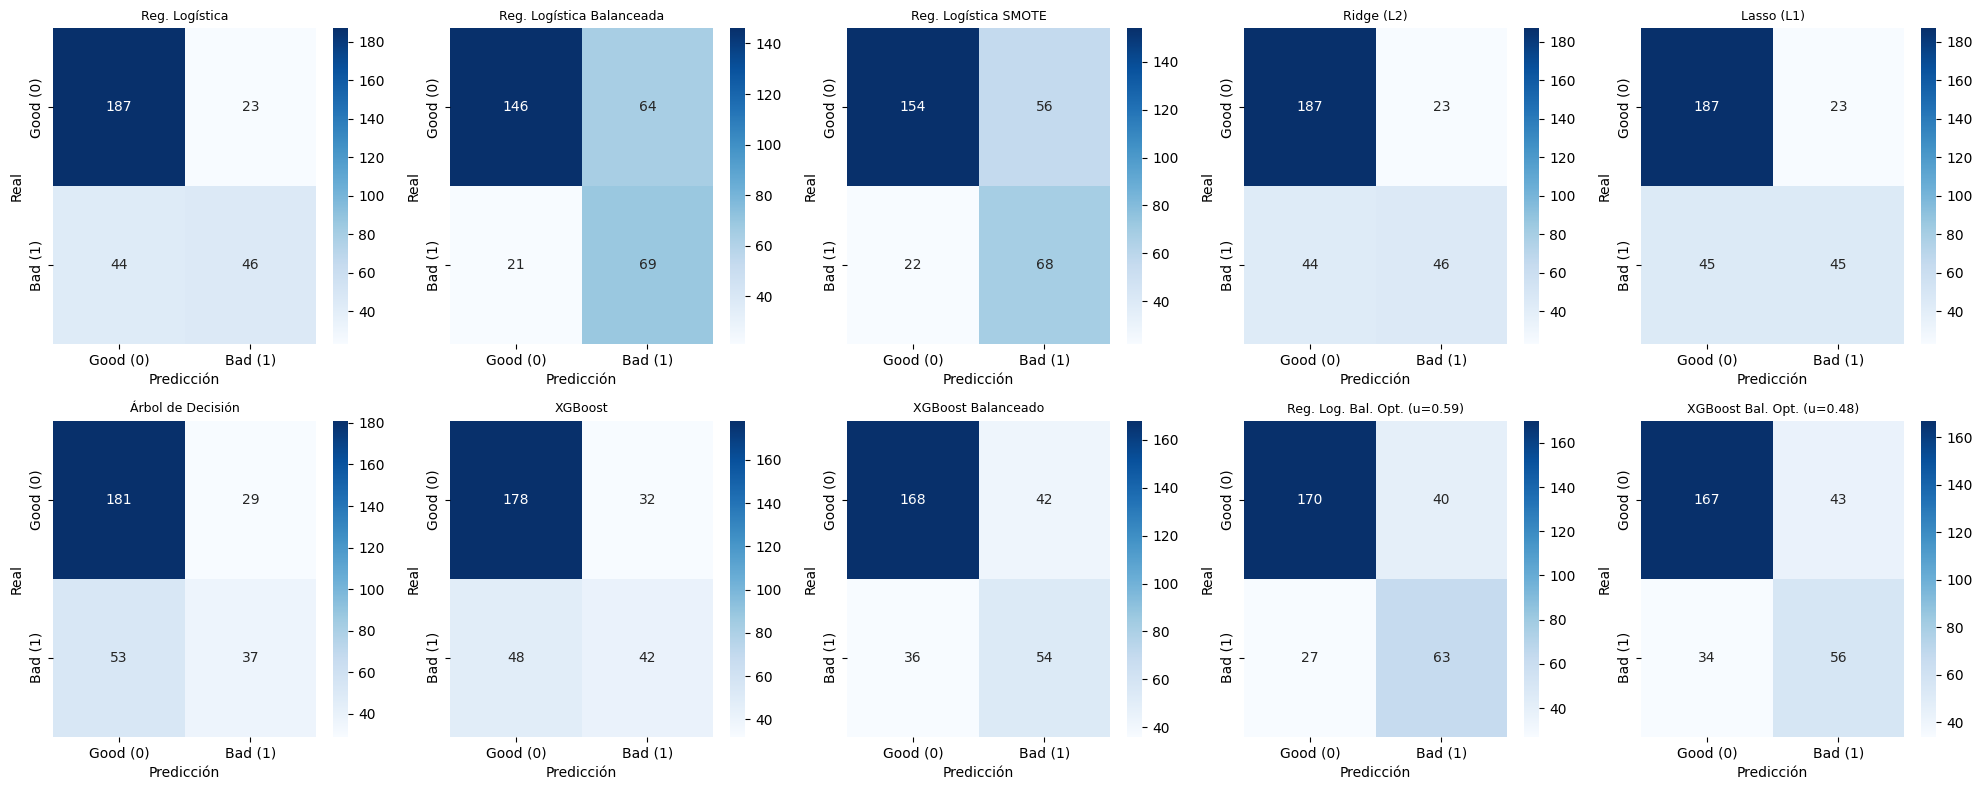

In [119]:
#  Comparación completa de todos los modelos
resultados = {}
conf_matrices = {}

# Modelos con umbral "normal"
modelos = {
    "Reg. Logística": log_reg,
    "Reg. Logística Balanceada": log_reg_bal,
    "Reg. Logística SMOTE": log_reg_smote,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "XGBoost": xgb_model,
    "XGBoost Balanceado": xgb_bal}

inputs = {
    "Reg. Logística": X_test_scaled,
    "Reg. Logística Balanceada": X_test_scaled,
    "Reg. Logística SMOTE": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "XGBoost": X_test_xgb,
    "XGBoost Balanceado": X_test_xgb}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred  = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados[nombre] = [acc, prec, rec, f1, auc]
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

# Reg. Logística Balanceada Optimizada
y_proba_log_bal = log_reg_bal.predict_proba(X_test_scaled)[:, 1]
y_pred_log_opt  = (y_proba_log_bal >= mejor_umbral_log).astype(int)

acc  = accuracy_score(y_test, y_pred_log_opt)
prec = precision_score(y_test, y_pred_log_opt)
rec  = recall_score(y_test, y_pred_log_opt)
f1   = f1_score(y_test, y_pred_log_opt)
auc  = roc_auc_score(y_test, y_proba_log_bal)

nombre_opt_log = f"Reg. Log. Bal. Opt. (u={mejor_umbral_log:.2f})"
resultados[nombre_opt_log] = [acc, prec, rec, f1, auc]
conf_matrices[nombre_opt_log] = confusion_matrix(y_test, y_pred_log_opt)

# XGBoost Balanceado Optimizado
y_proba_bal = xgb_bal.predict_proba(X_test_xgb)[:, 1]
y_pred_bal_opt = (y_proba_bal >= mejor_umbral).astype(int)

acc  = accuracy_score(y_test, y_pred_bal_opt)
prec = precision_score(y_test, y_pred_bal_opt)
rec  = recall_score(y_test, y_pred_bal_opt)
f1   = f1_score(y_test, y_pred_bal_opt)
auc  = roc_auc_score(y_test, y_proba_bal)

nombre_opt_xgb = f"XGBoost Bal. Opt. (u={mejor_umbral:.2f})"
resultados[nombre_opt_xgb] = [acc, prec, rec, f1, auc]
conf_matrices[nombre_opt_xgb] = confusion_matrix(y_test, y_pred_bal_opt)

# Tabla comparativa final
tabla_modelos = pd.DataFrame.from_dict(
    resultados,
    orient="index",
    columns=["Accuracy", "Precision", "Recall", "F1", "AUC"]
).reset_index().rename(columns={"index": "Modelo"})

# Redondeo para que se vea más limpio
tabla_modelos[["Accuracy", "Precision", "Recall", "F1", "AUC"]] = (
    tabla_modelos[["Accuracy", "Precision", "Recall", "F1", "AUC"]].round(4))

print(tabla_modelos.to_string(index=False))
print("\n")

# Matrices de confusión de todos los modelos
n_modelos = len(conf_matrices)
rows = 2
cols = math.ceil(n_modelos / rows)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'])
    ax.set_title(nombre, fontsize=9)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

# Eliminar ejes sobrantes si la rejilla es más grande que el número de modelos
for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

El modelo de **Regresión Logística Balanceada** tiene un recall de **0.77** para "bad" y **0.70** para "good". Sin embargo, el modelo **Regresión Logística con SMOTE** tiene un recall de **0.76** y es mejor clasificando "good", con un recall de **0.73**.

**4.18. LightGBM**

Se utiliza LightGBM porque maneja datos desbalanceados, con el fin de encontrar un mejor recall de "bad".

[LightGBM] [Info] Number of positive: 210, number of negative: 490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

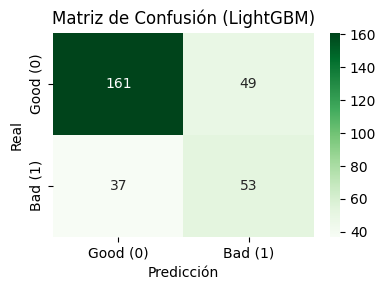

In [123]:
# Modelo LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight_lgbm,
    random_state=42)

# Entrenamiento
lgbm_model.fit(X_train_xgb, y_train)

# Probabilidades y predicciones
y_proba_lgbm = lgbm_model.predict_proba(X_test_xgb)[:, 1]
y_pred_lgbm  = lgbm_model.predict(X_test_xgb)

print("Reporte de Clasificación (LightGBM)\n")
print(classification_report(y_test, y_pred_lgbm))

# Métricas
acc_lgbm  = accuracy_score(y_test, y_pred_lgbm)
prec_lgbm = precision_score(y_test, y_pred_lgbm)
rec_lgbm  = recall_score(y_test, y_pred_lgbm)
f1_lgbm   = f1_score(y_test, y_pred_lgbm)
auc_lgbm  = roc_auc_score(y_test, y_proba_lgbm)

print(f"Accuracy : {acc_lgbm:.4f}")
print(f"Precision: {prec_lgbm:.4f}")
print(f"Recall   : {rec_lgbm:.4f}")
print(f"F1-score : {f1_lgbm:.4f}")
print(f"AUC      : {auc_lgbm:.4f}\n")

# Matriz de confusión
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("Matriz de Confusión (LightGBM)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

LightGBM:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.77

* Tiene buena clasificación de malos solicitantes: Recall Medio = 0.59

**4.19. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión, XGBoost, XGBoost Balanceado, XGBoost Balanceado Optimizado, Regresión Logística Balanceada, Regresión Logística Balanceada Optimizada, Regresión Logística con SMOTE y LightGBM**

                      Modelo  Accuracy  Precision  Recall     F1    AUC
              Reg. Logística    0.7767     0.6667  0.5111 0.5786 0.8026
   Reg. Logística Balanceada    0.7167     0.5188  0.7667 0.6188 0.8062
        Reg. Logística SMOTE    0.7400     0.5484  0.7556 0.6355 0.7947
                  Ridge (L2)    0.7767     0.6667  0.5111 0.5786 0.8026
                  Lasso (L1)    0.7733     0.6618  0.5000 0.5696 0.8023
           Árbol de Decisión    0.7267     0.5606  0.4111 0.4744 0.7457
                     XGBoost    0.7333     0.5676  0.4667 0.5122 0.7574
          XGBoost Balanceado    0.7400     0.5625  0.6000 0.5806 0.7522
                    LightGBM    0.7133     0.5196  0.5889 0.5521 0.7637
Reg. Log. Bal. Opt. (u=0.59)    0.7767     0.6117  0.7000 0.6528 0.8062
  XGBoost Bal. Opt. (u=0.48)    0.7433     0.5657  0.6222 0.5926 0.7522




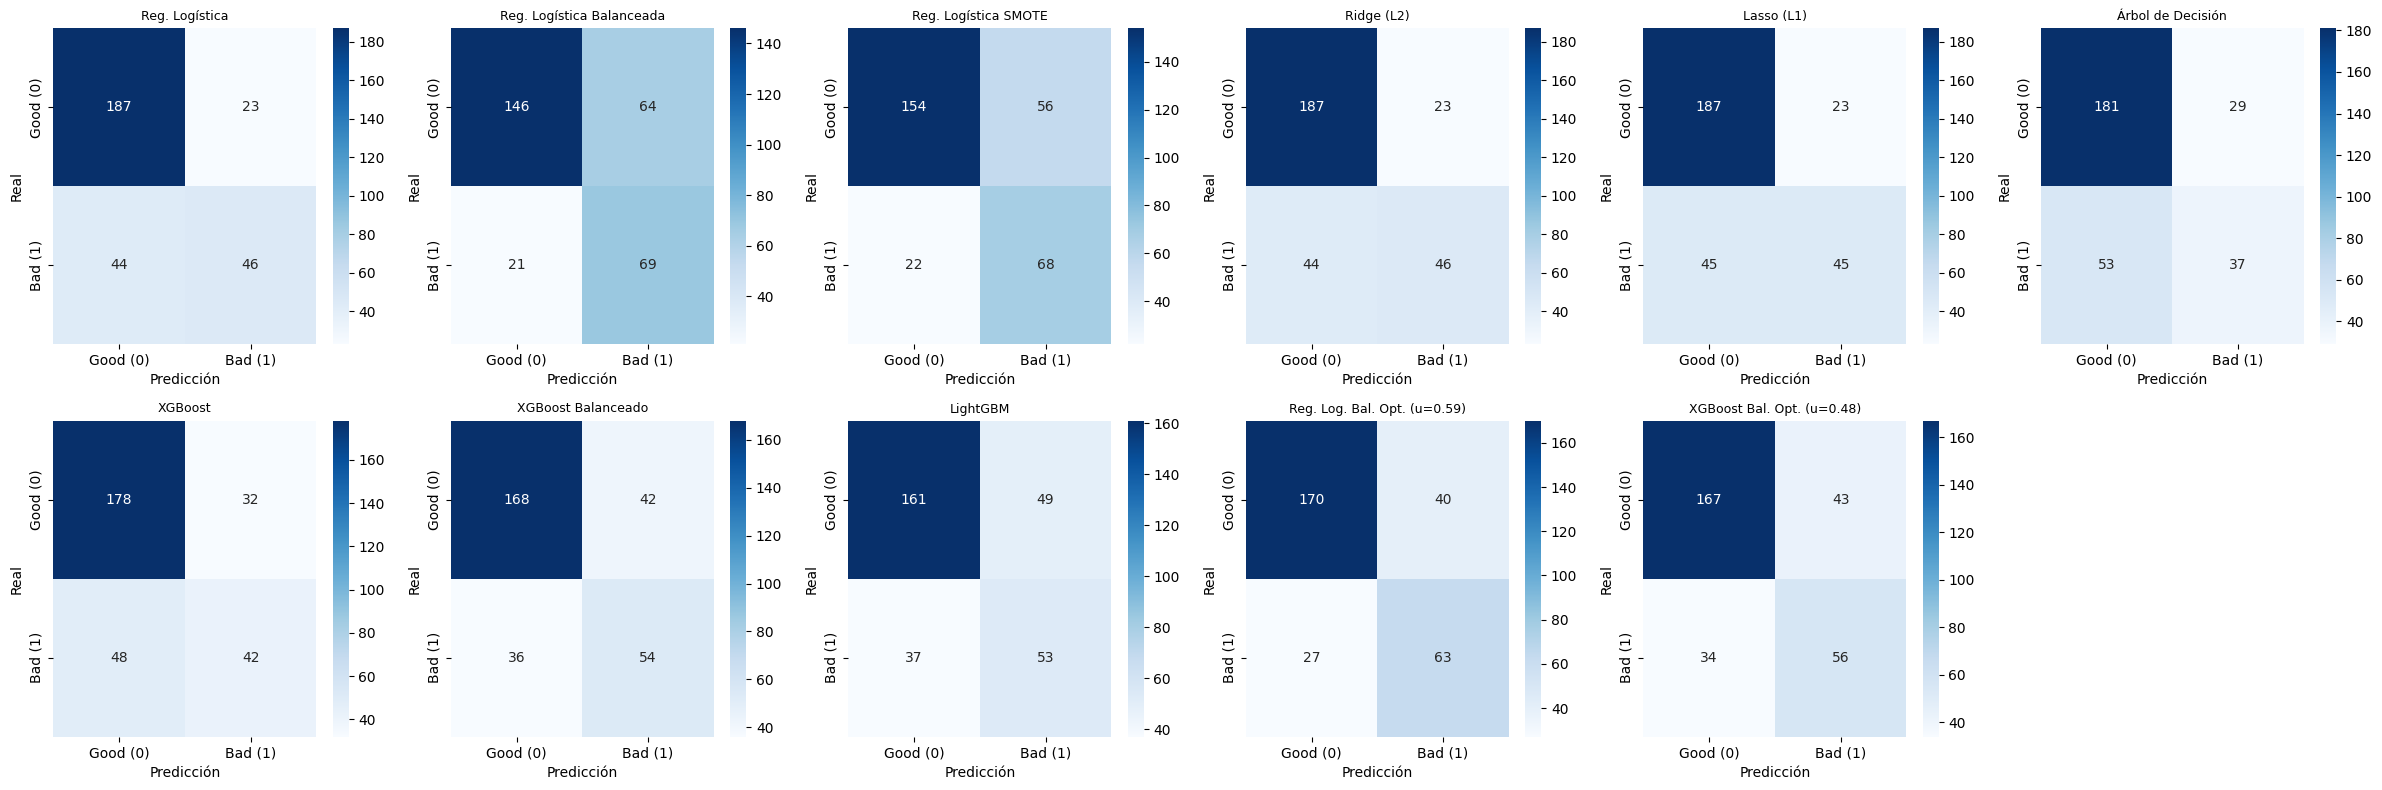

In [126]:
# Modelos con umbral "normal"
modelos = {
    "Reg. Logística": log_reg,
    "Reg. Logística Balanceada": log_reg_bal,
    "Reg. Logística SMOTE": log_reg_smote,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "XGBoost": xgb_model,
    "XGBoost Balanceado": xgb_bal,
    "LightGBM": lgbm_model}

inputs = {
    "Reg. Logística": X_test_scaled,
    "Reg. Logística Balanceada": X_test_scaled,
    "Reg. Logística SMOTE": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "XGBoost": X_test_xgb,
    "XGBoost Balanceado": X_test_xgb,
    "LightGBM": X_test_xgb}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred  = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados[nombre] = [acc, prec, rec, f1, auc]
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

# Reg. Logística Balanceada OPTIMIZADA
y_proba_log_bal = log_reg_bal.predict_proba(X_test_scaled)[:, 1]
y_pred_log_opt  = (y_proba_log_bal >= mejor_umbral_log).astype(int)

acc  = accuracy_score(y_test, y_pred_log_opt)
prec = precision_score(y_test, y_pred_log_opt)
rec  = recall_score(y_test, y_pred_log_opt)
f1   = f1_score(y_test, y_pred_log_opt)
auc  = roc_auc_score(y_test, y_proba_log_bal)

nombre_opt_log = f"Reg. Log. Bal. Opt. (u={mejor_umbral_log:.2f})"
resultados[nombre_opt_log] = [acc, prec, rec, f1, auc]
conf_matrices[nombre_opt_log] = confusion_matrix(y_test, y_pred_log_opt)

# XGBoost Balanceado OPTIMIZADO
y_proba_bal = xgb_bal.predict_proba(X_test_xgb)[:, 1]
y_pred_bal_opt = (y_proba_bal >= mejor_umbral).astype(int)

acc  = accuracy_score(y_test, y_pred_bal_opt)
prec = precision_score(y_test, y_pred_bal_opt)
rec  = recall_score(y_test, y_pred_bal_opt)
f1   = f1_score(y_test, y_pred_bal_opt)
auc  = roc_auc_score(y_test, y_proba_bal)

nombre_opt_xgb = f"XGBoost Bal. Opt. (u={mejor_umbral:.2f})"
resultados[nombre_opt_xgb] = [acc, prec, rec, f1, auc]
conf_matrices[nombre_opt_xgb] = confusion_matrix(y_test, y_pred_bal_opt)

# Tabla comparativa final
tabla_modelos = pd.DataFrame.from_dict(
    resultados,
    orient="index",
    columns=["Accuracy", "Precision", "Recall", "F1", "AUC"]
).reset_index().rename(columns={"index": "Modelo"})

# Redondear para ver más limpio
tabla_modelos[["Accuracy", "Precision", "Recall", "F1", "AUC"]] = (
    tabla_modelos[["Accuracy", "Precision", "Recall", "F1", "AUC"]].round(4))

print(tabla_modelos.to_string(index=False))
print("\n")

# Matrices de confusión de todos los modelos
n_modelos = len(conf_matrices)
rows = 2
cols = math.ceil(n_modelos / rows)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'])
    ax.set_title(nombre, fontsize=9)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

# Eliminar ejes sobrantes si la rejilla es más grande que el número de modelos
for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Los mejores modelos continúan siendo:

**Regresión Logística Balanceada** tiene un recall de **0.77** para "bad" y **0.70** para "good".

**Regresión Logística con SMOTE** tiene un recall de **0.76** para "bad" y **0.73** para "good".

**4.20. Random Forest**

Se utiliza Random Forest con balanceo de clases con el fin de encontrar un mejor recall de "bad".

🔹 Reporte de Clasificación (Random Forest)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       210
           1       0.54      0.66      0.59        90

    accuracy                           0.73       300
   macro avg       0.69      0.71      0.70       300
weighted avg       0.75      0.73      0.74       300

Accuracy : 0.7300
Precision: 0.5413
Recall   : 0.6556
F1-score : 0.5930
AUC      : 0.7748



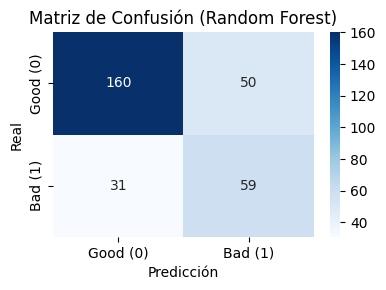

In [131]:
# Modelo Random Forest con balanceo de clases
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced')

# Entrenamiento con los datos originales (no escalados)
rf_model.fit(X_train, y_train)

# Probabilidades y predicciones en test
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf  = rf_model.predict(X_test)

print("Reporte de Clasificación (Random Forest)\n")
print(classification_report(y_test, y_pred_rf))

acc_rf  = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf  = recall_score(y_test, y_pred_rf)
f1_rf   = f1_score(y_test, y_pred_rf)
auc_rf  = roc_auc_score(y_test, y_proba_rf)

print(f"Accuracy : {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall   : {rec_rf:.4f}")
print(f"F1-score : {f1_rf:.4f}")
print(f"AUC      : {auc_rf:.4f}\n")

# Matriz de confusión individual (opcional)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good (0)', 'Bad (1)'],
            yticklabels=['Good (0)', 'Bad (1)'])
plt.title("Matriz de Confusión (Random Forest)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Random Forest:

* Funciona bien clasificando buenos solicitantes: Recall Alto = 0.76

* Tiene buena clasificación de malos solicitantes: Recall Medio = 0.66

**4.19. Comparación de los Modelos Regresión Logística, Ridge, Lasso, Árbol de Decisión, XGBoost, XGBoost Balanceado, XGBoost Balanceado Optimizado, Regresión Logística Balanceada, Regresión Logística Balanceada Optimizada, Regresión Logística con SMOTE, LightGBM y Random Forest**

                      Modelo  Accuracy  Precision  Recall     F1    AUC
              Reg. Logística    0.7767     0.6667  0.5111 0.5786 0.8026
   Reg. Logística Balanceada    0.7167     0.5188  0.7667 0.6188 0.8062
        Reg. Logística SMOTE    0.7400     0.5484  0.7556 0.6355 0.7947
                  Ridge (L2)    0.7767     0.6667  0.5111 0.5786 0.8026
                  Lasso (L1)    0.7733     0.6618  0.5000 0.5696 0.8023
           Árbol de Decisión    0.7267     0.5606  0.4111 0.4744 0.7457
               Random Forest    0.7300     0.5413  0.6556 0.5930 0.7748
                     XGBoost    0.7333     0.5676  0.4667 0.5122 0.7574
          XGBoost Balanceado    0.7400     0.5625  0.6000 0.5806 0.7522
                    LightGBM    0.7133     0.5196  0.5889 0.5521 0.7637
Reg. Log. Bal. Opt. (u=0.59)    0.7767     0.6117  0.7000 0.6528 0.8062
  XGBoost Bal. Opt. (u=0.48)    0.7433     0.5657  0.6222 0.5926 0.7522




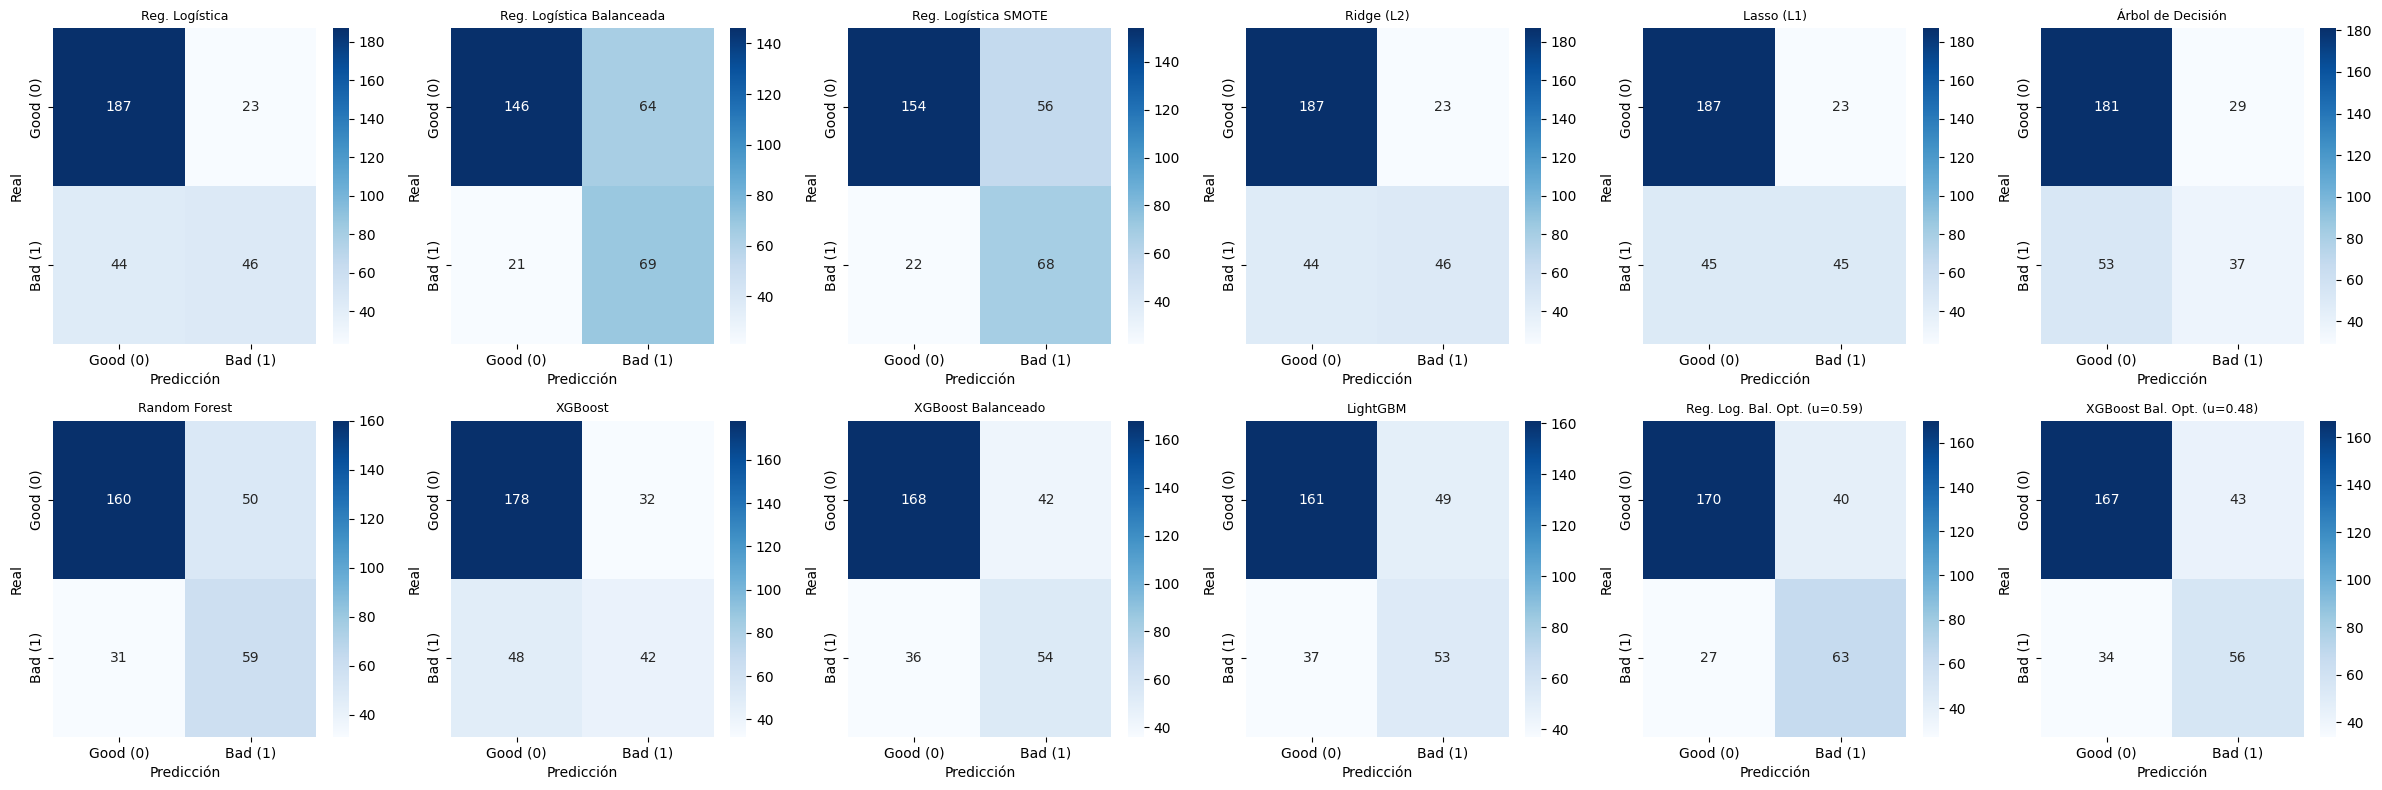

In [133]:
# Modelos con umbral "normal"
modelos = {
    "Reg. Logística": log_reg,
    "Reg. Logística Balanceada": log_reg_bal,
    "Reg. Logística SMOTE": log_reg_smote,
    "Ridge (L2)": log_reg_ridge,
    "Lasso (L1)": log_reg_lasso,
    "Árbol de Decisión": arbol,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "XGBoost Balanceado": xgb_bal,
    "LightGBM": lgbm_model}

inputs = {
    "Reg. Logística": X_test_scaled,
    "Reg. Logística Balanceada": X_test_scaled,
    "Reg. Logística SMOTE": X_test_scaled,
    "Ridge (L2)": X_test_scaled,
    "Lasso (L1)": X_test_scaled,
    "Árbol de Decisión": X_test,
    "Random Forest": X_test,
    "XGBoost": X_test_xgb,
    "XGBoost Balanceado": X_test_xgb,
    "LightGBM": X_test_xgb}

for nombre, modelo in modelos.items():
    X_test_input = inputs[nombre]

    y_pred  = modelo.predict(X_test_input)
    y_proba = modelo.predict_proba(X_test_input)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_proba)

    resultados[nombre] = [acc, prec, rec, f1, auc]
    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)

# Reg. Logística Balanceada Optimizada
y_proba_log_bal = log_reg_bal.predict_proba(X_test_scaled)[:, 1]
y_pred_log_opt  = (y_proba_log_bal >= mejor_umbral_log).astype(int)

acc  = accuracy_score(y_test, y_pred_log_opt)
prec = precision_score(y_test, y_pred_log_opt)
rec  = recall_score(y_test, y_pred_log_opt)
f1   = f1_score(y_test, y_pred_log_opt)
auc  = roc_auc_score(y_test, y_proba_log_bal)

nombre_opt_log = f"Reg. Log. Bal. Opt. (u={mejor_umbral_log:.2f})"
resultados[nombre_opt_log] = [acc, prec, rec, f1, auc]
conf_matrices[nombre_opt_log] = confusion_matrix(y_test, y_pred_log_opt)

# XGBoost Balanceado Optimizado
y_proba_bal = xgb_bal.predict_proba(X_test_xgb)[:, 1]
y_pred_bal_opt = (y_proba_bal >= mejor_umbral).astype(int)

acc  = accuracy_score(y_test, y_pred_bal_opt)
prec = precision_score(y_test, y_pred_bal_opt)
rec  = recall_score(y_test, y_pred_bal_opt)
f1   = f1_score(y_test, y_pred_bal_opt)
auc  = roc_auc_score(y_test, y_proba_bal)

nombre_opt_xgb = f"XGBoost Bal. Opt. (u={mejor_umbral:.2f})"
resultados[nombre_opt_xgb] = [acc, prec, rec, f1, auc]
conf_matrices[nombre_opt_xgb] = confusion_matrix(y_test, y_pred_bal_opt)

# Tabla comparativa final
tabla_modelos = pd.DataFrame.from_dict(
    resultados,
    orient="index",
    columns=["Accuracy", "Precision", "Recall", "F1", "AUC"]
).reset_index().rename(columns={"index": "Modelo"})

tabla_modelos[["Accuracy", "Precision", "Recall", "F1", "AUC"]] = (
    tabla_modelos[["Accuracy", "Precision", "Recall", "F1", "AUC"]].round(4))

print(tabla_modelos.to_string(index=False))
print("\n")

# Matrices de confusión de todos los modelos
n_modelos = len(conf_matrices)
rows = 2
cols = math.ceil(n_modelos / rows)

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for ax, (nombre, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Good (0)', 'Bad (1)'],
                yticklabels=['Good (0)', 'Bad (1)'])
    ax.set_title(nombre, fontsize=9)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Los mejores modelos continúan siendo:

**Regresión Logística Balanceada** tiene un recall de **0.77** para "bad" y **0.70** para "good".

**Regresión Logística con SMOTE** tiene un recall de **0.76** para "bad" y **0.73** para "good".

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

pipe_gb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', gb)
])

pipe_gb.fit(X_train, y_train)

y_pred_gb  = pipe_gb.predict(X_test)
y_proba_gb = pipe_gb.predict_proba(X_test)[:, 1]

print("=== Gradient Boosting ===")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("Recall   :", recall_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("F1       :", f1_score(y_test, y_pred_gb))
print("AUC      :", roc_auc_score(y_test, y_proba_gb))
print("\nClassification report:\n", classification_report(y_test, y_pred_gb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_gb))

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=400,
    learning_rate=0.05,
    depth=5,
    loss_function='Logloss',
    eval_metric='AUC',
    scale_pos_weight=scale_pos_weight,
    verbose=False,
    random_seed=42
)

pipe_cat = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', cat)
])

pipe_cat.fit(X_train, y_train)

y_pred_cat  = pipe_cat.predict(X_test)
y_proba_cat = pipe_cat.predict_proba(X_test)[:, 1]

print("=== CatBoost ===")
print("Accuracy :", accuracy_score(y_test, y_pred_cat))
print("Recall   :", recall_score(y_test, y_pred_cat))
print("Precision:", precision_score(y_test, y_pred_cat))
print("F1       :", f1_score(y_test, y_pred_cat))
print("AUC      :", roc_auc_score(y_test, y_proba_cat))
print("\nClassification report:\n", classification_report(y_test, y_pred_cat))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_cat))

In [ ]:
# LightGBM
resumenes.append(resumen_modelo("LightGBM",
                                y_test, y_pred_lgbm, y_proba_lgbm))

# CatBoost
resumenes.append(resumen_modelo("CatBoost",
                                y_test, y_pred_cat, y_proba_cat))

# Random Forest optimizado
resumenes.append(resumen_modelo("Random Forest opt",
                                y_test, y_pred_rf, y_proba_rf))

# Gradient Boosting
resumenes.append(resumen_modelo("Gradient Boosting",
                                y_test, y_pred_gb, y_proba_gb))

tabla_final_modelos = pd.DataFrame(resumenes, columns=cols)
tabla_final_modelos.sort_values("Recall", ascending=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Probabilidades de cada modelo
# Logístico balanceado (con y sin umbral comparten estas probabilidades)
# Asegúrate de tener esto definido antes:
# y_proba_log_bal = pipe_log_bal.predict_proba(X_test)[:, 1]

# XGBoost optimizado (umbral 0.36 usa estas mismas probabilidades)
# Asegúrate de tener esto definido antes:
# y_proba_opt = best_xgb.predict_proba(X_test)[:, 1]

# === CURVAS ROC ===
fpr_log, tpr_log, thr_log = roc_curve(y_test, y_proba_log_bal)
fpr_xgb, tpr_xgb, thr_xgb = roc_curve(y_test, y_proba_opt)

auc_log = auc(fpr_log, tpr_log)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Puntos de operación (umbrales) para marcar en la curva ROC
def punto_umbral(fpr, tpr, thr, umbral):
    idx = np.argmin(np.abs(thr - umbral))
    return fpr[idx], tpr[idx]

fpr_log_050, tpr_log_050 = punto_umbral(fpr_log, tpr_log, thr_log, 0.50)
fpr_log_042, tpr_log_042 = punto_umbral(fpr_log, tpr_log, thr_log, 0.42)
fpr_xgb_036, tpr_xgb_036 = punto_umbral(fpr_xgb, tpr_xgb, thr_xgb, 0.36)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logístico balanceado (AUC = {auc_log:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost opt (AUC = {auc_xgb:.3f})")

# Puntos de operación
plt.scatter(fpr_log_050, tpr_log_050, marker="o", label="Logístico (umbral=0.50)")
plt.scatter(fpr_log_042, tpr_log_042, marker="s", label="Logístico (umbral=0.42)")
plt.scatter(fpr_xgb_036, tpr_xgb_036, marker="^", label="XGBoost (umbral=0.36)")

plt.plot([0,1],[0,1],'--',label="Línea azar")
plt.xlabel("Tasa de falsos positivos (1 - Especificidad)")
plt.ylabel("Tasa de verdaderos positivos (Recall)")
plt.title("Curvas ROC - Mejores modelos")
plt.legend()
plt.grid(True)
plt.show()

# === CURVAS PRECISION–RECALL ===
prec_log, rec_log, thr_pr_log = precision_recall_curve(y_test, y_proba_log_bal)
prec_xgb, rec_xgb, thr_pr_xgb = precision_recall_curve(y_test, y_proba_opt)

# Para marcar los umbrales en PR:
def punto_umbral_pr(prec, rec, thr, umbral):
    # thr tiene tamaño len-1 respecto a prec/rec
    idx = np.argmin(np.abs(thr - umbral))
    return prec[idx], rec[idx]

prec_log_050, rec_log_050 = punto_umbral_pr(prec_log, rec_log, thr_pr_log, 0.50)
prec_log_042, rec_log_042 = punto_umbral_pr(prec_log, rec_log, thr_pr_log, 0.42)
prec_xgb_036, rec_xgb_036 = punto_umbral_pr(prec_xgb, rec_xgb, thr_pr_xgb, 0.36)

plt.figure(figsize=(8,6))
plt.plot(rec_log, prec_log, label="Logístico balanceado")
plt.plot(rec_xgb, prec_xgb, label="XGBoost optimizado")

plt.scatter(rec_log_050, prec_log_050, marker="o", label="Logístico (umbral=0.50)")
plt.scatter(rec_log_042, prec_log_042, marker="s", label="Logístico (umbral=0.42)")
plt.scatter(rec_xgb_036, prec_xgb_036, marker="^", label="XGBoost (umbral=0.36)")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision–Recall - Mejores modelos")
plt.legend()
plt.grid(True)
plt.show()

Supuestos